# Исследовательский анализ данных развлекательного приложения Procrastinate Pro+


Цель:
разобраться в причинах убытков и помочь компании выйти в плюс

Задачи изучения:
 - откуда приходят пользователи и какими устройствами они пользуются,
 - сколько стоит привлечение пользователей из различных рекламмных каналов,
 - сколько денег приносит каждый клиент,
 - когда расходы на привлечение клиента окупаются,
 - какие факторы мешают привлечению клиентов.

Данные в распоряжении

1. Данные о пользователях:
 - лог сервера с данными об их посещениях
 - информация о заказах за этот период   
2. Рекламные расходы

Период: c 1 мая 2019 по 27 октября 2019 гг

## Описание данных

Лог сервера с информацией о посещениях сайта   
Структура `visits_info_short.csv`:
 - `User Id` - уникальный идентификатор пользователя
 - `Region` - страна пользователя
 - `Device` - тип устройства пользователя
 - `Channel` - идентификатор источника перехода
 - `Sesion Start` - дата и время начала сессии
 - `Session End` - дата и время окончания сессии

Информация о заказах   
Структура `orders_info_short.csv`:
 - `User Id` - уникальный идентификатор пользователя
 - `Event Dt` - дата и время покупки
 - `Revenue` - сумма заказа

Информация о расходах на рекламу  
Структура `costs_info_short.csv`:
 - `dt` - дата проведения рекламной компании
 - `Channel` - идентификатор рекламного источника
 - `costs` - расходы на это кампанию
 

## Загрузка данных


Загружаем необходимые библиотеки

In [291]:
import pandas as pd
from matplotlib import pyplot as plt
from datetime import datetime, timedelta
import numpy as np
import warnings
warnings.filterwarnings('ignore')

import plotly.express as px  

from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)

## Предобработка

Изучим  информацию о данных в каждом файле

In [293]:
def get_info_dataframe(dataframe,
                       transpose=False,
                       count_rows=5
                       ):
    """
    получение основной информации о датафрейме: первые строки датафрейма, количество строк, столбцов, дубликатов, пропусков, типы данных
    `dataframe` - исследуемый датафрейм,  
    `transpose` - перевернуть таблицу на 90°,   
    `count_rows` - чило выводимых строк датафрейма (по умолчанию 5)
    """

    # -----------------сбока таблицы с пропусками---------------------

    # число пропусков

    count_missing = dataframe.isna().sum()

    # доля пропусков

    missing_percent = count_missing/len(dataframe)*100

    # сборка

    df = pd.DataFrame(data={'missing': missing_percent,
                            'count_missing': count_missing
                            }
                      )

    dt = pd.DataFrame(data={'type': dataframe.dtypes})
    df = df.join(dt)

    # цветной бар в столбце с долей пропусков и добапвляем знак %

    df = df.sort_values('missing', ascending=True)

    def color(x):
        if "int" in str(x) or "float" in str(x):
            return "color:#3399ff"
        elif x == "object":
            return "color: #ff00ff"
        else:
            return "color: orange"

    table_missing = (df.style
                     .set_table_styles([{
                         'selector': 'tr:hover',
                         'props': [('background-color', '#222222'), ('color', 'white')]
                         # [('border-color', 'blue'), ('border-style', 'solid'), ('border-width', '1pt')]
                     }])
                     .map(lambda x: ""
                          if x > 0
                          else "color: #32cd32; font-weight:600",
                          subset=["missing", "count_missing"])


                     .map(color,
                          subset=["type"])

                     .bar(subset="missing",
                          vmax=100,
                          height=90,
                          color="#ff0000",
                          )
                     .set_caption('Пропуски и тип данных')
                     .format(subset="missing",
                             formatter="{:.2f} %")

                     )

    # --------------------------------------

    # -------------------------

    # часть таблицы
    rows, columns = dataframe.shape

    # поиск дубликатов
    dublicat = dataframe.duplicated().sum()

    # харатеристики таблицы
    table_shape_duplicat = pd.DataFrame({"rows": [rows],
                                         "columns": [columns],
                                         "duplicates": [dublicat]})

    table_shape_duplicat = (table_shape_duplicat.style

                            .map(lambda x: "background-color: #ff0000; color:black; font-weight:600"
                                 if x > 0
                                 else "background: #32cd32; color:black; font-weight:600",
                                 subset=["duplicates"]))

    # -------------------- вывод на экран --------------

    table_first_row = dataframe.head(count_rows)
    if transpose:
        display(table_first_row.T)
    else:
        display(table_first_row)

    display(table_shape_duplicat)

    display(table_missing)

    # разделительная линия
    print("===="*10, "\n")

    # -------------------------------------------------

In [294]:
aliass_df = {'sessions':sessions,
             'orders':orders,
             'costs':costs}

for df, name in zip(aliass_df.values(),
                    aliass_df.keys()):

    print(name.upper())
    get_info_dataframe(df)

SESSIONS


,User Id,Region,Device,Channel,Session Start,Session End
0,981449118918,United States,iPhone,organic,2019-05-01 02:36:01,2019-05-01 02:45:01
1,278965908054,United States,iPhone,organic,2019-05-01 04:46:31,2019-05-01 04:47:35
2,590706206550,United States,Mac,organic,2019-05-01 14:09:25,2019-05-01 15:32:08
3,326433527971,United States,Android,TipTop,2019-05-01 00:29:59,2019-05-01 00:54:25
4,349773784594,United States,Mac,organic,2019-05-01 03:33:35,2019-05-01 03:57:40


,rows,columns,duplicates
0,309901,6,0


,missing,count_missing,type
User Id,0.00 %,0,int64
Region,0.00 %,0,object
Device,0.00 %,0,object
Channel,0.00 %,0,object
Session Start,0.00 %,0,object
Session End,0.00 %,0,object



ORDERS


,User Id,Event Dt,Revenue
0,188246423999,2019-05-01 23:09:52,4.99
1,174361394180,2019-05-01 12:24:04,4.99
2,529610067795,2019-05-01 11:34:04,4.99
3,319939546352,2019-05-01 15:34:40,4.99
4,366000285810,2019-05-01 13:59:51,4.99


,rows,columns,duplicates
0,40212,3,0


,missing,count_missing,type
User Id,0.00 %,0,int64
Event Dt,0.00 %,0,object
Revenue,0.00 %,0,float64



COSTS


,dt,Channel,costs
0,2019-05-01,FaceBoom,113.3
1,2019-05-02,FaceBoom,78.1
2,2019-05-03,FaceBoom,85.8
3,2019-05-04,FaceBoom,136.4
4,2019-05-05,FaceBoom,122.1


,rows,columns,duplicates
0,1800,3,0


,missing,count_missing,type
dt,0.00 %,0,object
Channel,0.00 %,0,object
costs,0.00 %,0,float64


Заметим  
 - пропусков в датафреймах нет
 - даты имеют разноые представления - в costs это просто дата, в других датафреймах - дата и время.
 
Следует привести 
 - названия столбцов во всех датафреймах к змеиному регистру  
 - даты к соответсвующему типу. 


In [295]:
for df, name in zip(aliass_df.values(),
                    aliass_df.keys()):


    # заменяем пробелы на _ и делаем все буквы маленькими

    df.columns = df.columns.str.replace(' ', '_').str.lower()


    # показываем красиво

    print(f'\ndataframe: {name}\n{"."*15}'.upper())

    print(df.columns)


DATAFRAME: SESSIONS
...............
Index(['user_id', 'region', 'device', 'channel', 'session_start',
       'session_end'],
      dtype='object')

DATAFRAME: ORDERS
...............
Index(['user_id', 'event_dt', 'revenue'], dtype='object')

DATAFRAME: COSTS
...............
Index(['dt', 'channel', 'costs'], dtype='object')


In [296]:
# приводим даты  к нужномцу типу
sessions['session_end'] = pd.to_datetime(sessions['session_end'])
sessions['session_start'] = pd.to_datetime(sessions['session_start'])
orders['event_dt'] = pd.to_datetime(orders['event_dt'])
costs['dt'] = pd.to_datetime(costs['dt']).dt.date

# проверяем
for df, name in zip(aliass_df.values(),
                    aliass_df.keys()):
    
    print(f'\ndataframe: {name}\n{"."*20}'.upper())
    print(df.dtypes)


DATAFRAME: SESSIONS
....................
user_id                   int64
region                   object
device                   object
channel                  object
session_start    datetime64[ns]
session_end      datetime64[ns]
dtype: object

DATAFRAME: ORDERS
....................
user_id              int64
event_dt    datetime64[ns]
revenue            float64
dtype: object

DATAFRAME: COSTS
....................
dt          object
channel     object
costs      float64
dtype: object


Проверим наличие неявных дубликатов в столбцах со странами и устройствами пользователей

In [297]:
dev = sessions['device'].unique()
reg = sessions['region'].unique()

print(f'Устройства\n{dev}\n')

print(f'Страны\n{reg}')

Устройства
['iPhone' 'Mac' 'Android' 'PC']

Страны
['United States' 'UK' 'France' 'Germany']


Неявные дубликаты отсутсвуют

### Заданим функции для рассчета и анализа LTV, ROI, удержания и конверсии

для дальнейших вычислений понадобятся соотвествующие функции

#### Функция для создания пользовательских профилей

In [298]:
# функция для создания пользовательских профилей

def get_profiles(sessions, orders, ad_costs):

    # находим параметры первых посещений
    profiles = (
        sessions.sort_values(by=['user_id', 'session_start'])
        .groupby('user_id')
        .agg(
            {
                'session_start': 'first',
                'channel': 'first',
                'device': 'first',
                'region': 'first',
            }
        )
        .rename(columns={'session_start': 'first_ts'})
        .reset_index()
    )

    # для когортного анализа определяем дату первого посещения
    # и первый день месяца, в который это посещение произошло
    profiles['dt'] = profiles['first_ts'].dt.date
    profiles['month'] = profiles['first_ts'].dt.month

    # добавляем признак платящих пользователей
    profiles['payer'] = profiles['user_id'].isin(orders['user_id'].unique())

    # считаем количество уникальных пользователей
    # с одинаковыми источником и датой привлечения
    new_users = (
        profiles.groupby(['dt', 'channel'])
        .agg({'user_id': 'nunique'})
        .rename(columns={'user_id': 'unique_users'})
        .reset_index()
    )

    # объединяем траты на рекламу и число привлечённых пользователей
    ad_costs = ad_costs.merge(new_users, on=['dt', 'channel'], how='left')

    # делим рекламные расходы на число привлечённых пользователей
    ad_costs['acquisition_cost'] = ad_costs['costs'] / ad_costs['unique_users']

    # добавляем стоимость привлечения в профили
    profiles = profiles.merge(
        ad_costs[['dt', 'channel', 'acquisition_cost']],
        on=['dt', 'channel'],
        how='left'
    )

    # стоимость привлечения органических пользователей равна нулю
    profiles['acquisition_cost'] = profiles['acquisition_cost'].fillna(0)

    return profiles

#### Функция для расчета удержания

In [299]:
# функция для расчёта удержания

def get_retention(
    profiles,
    sessions,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # добавляем столбец payer в передаваемый dimensions список
    dimensions = ['payer'] + dimensions

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # собираем «сырые» данные для расчёта удержания
    result_raw = result_raw.merge(
        sessions[['user_id', 'session_start']], on='user_id', how='left'
    )
    result_raw['lifetime'] = (
        result_raw['session_start'] - result_raw['first_ts']
    ).dt.days

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу удержания
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # получаем таблицу динамики удержания
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time

#### Функция для расчета конверсии

In [300]:

# функция для расчёта конверсии

def get_conversion(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # определяем дату и время первой покупки для каждого пользователя
    first_purchases = (
        purchases.sort_values(by=['user_id', 'event_dt'])
        .groupby('user_id')
        .agg({'event_dt': 'first'})
        .reset_index()
    )

    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        first_purchases[['user_id', 'event_dt']], on='user_id', how='left'
    )

    # рассчитываем лайфтайм для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days

    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        result = result.fillna(0).cumsum(axis=1)
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # делим каждую «ячейку» в строке на размер когорты
        # и получаем conversion rate
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу конверсии
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # для таблицы динамики конверсии убираем 'cohort' из dimensions
    if 'cohort' in dimensions:
        dimensions = []

    # получаем таблицу динамики конверсии
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time

#### Функция для расчета LTV и ROI

In [301]:
# функция для расчёта LTV и ROI

def get_ltv(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')
    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        purchases[['user_id', 'event_dt', 'revenue']], on='user_id', how='left'
    )
    # рассчитываем лайфтайм пользователя для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days
    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # функция группировки по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        # строим «треугольную» таблицу выручки
        result = df.pivot_table(
            index=dims, columns='lifetime', values='revenue', aggfunc='sum'
        )
        # находим сумму выручки с накоплением
        result = result.fillna(0).cumsum(axis=1)
        # вычисляем размеры когорт
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        # объединяем размеры когорт и таблицу выручки
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # считаем LTV: делим каждую «ячейку» в строке на размер когорты
        result = result.div(result['cohort_size'], axis=0)
        # исключаем все лайфтаймы, превышающие горизонт анализа
        result = result[['cohort_size'] + list(range(horizon_days))]
        # восстанавливаем размеры когорт
        result['cohort_size'] = cohort_sizes

        # собираем датафрейм с данными пользователей и значениями CAC,
        # добавляя параметры из dimensions
        cac = df[['user_id', 'acquisition_cost'] + dims].drop_duplicates()

        # считаем средний CAC по параметрам из dimensions
        cac = (
            cac.groupby(dims)
            .agg({'acquisition_cost': 'mean'})
            .rename(columns={'acquisition_cost': 'cac'})
        )

        # считаем ROI: делим LTV на CAC
        roi = result.div(cac['cac'], axis=0)

        # удаляем строки с бесконечным ROI
        roi = roi[~roi['cohort_size'].isin([np.inf])]

        # восстанавливаем размеры когорт в таблице ROI
        roi['cohort_size'] = cohort_sizes

        # добавляем CAC в таблицу ROI
        roi['cac'] = cac['cac']

        # в финальной таблице оставляем размеры когорт, CAC
        # и ROI в лайфтаймы, не превышающие горизонт анализа
        roi = roi[['cohort_size', 'cac'] + list(range(horizon_days))]

        # возвращаем таблицы LTV и ROI
        return result, roi

    # получаем таблицы LTV и ROI
    result_grouped, roi_grouped = group_by_dimensions(
        result_raw, dimensions, horizon_days
    )

    # для таблиц динамики убираем 'cohort' из dimensions
    if 'cohort' in dimensions:
        dimensions = []

    # получаем таблицы динамики LTV и ROI
    result_in_time, roi_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    return (
        result_raw,  # сырые данные
        result_grouped,  # таблица LTV
        result_in_time,  # таблица динамики LTV
        roi_grouped,  # таблица ROI
        roi_in_time,  # таблица динамики ROI
    )

#### Функции для построения графиков

##### функция для сглаживания фрейма

In [302]:
# функция для сглаживания фрейма

def filter_data(df, window):
    # для каждого столбца применяем скользящее среднее
    for column in df.columns.values:
        df[column] = df[column].rolling(window).mean()
    return df

##### функция для визуализации удержания

In [303]:
# функция для визуализации удержания

def plot_retention(retention, retention_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 10))

    # исключаем размеры когорт и удержание первого дня
    retention = retention.drop(columns=['cohort_size', 0])
    # в таблице динамики оставляем только нужный лайфтайм
    retention_history = retention_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # если в индексах таблицы удержания только payer,
    # добавляем второй признак — cohort
    if retention.index.nlevels == 1:
        retention['cohort'] = 'All users'
        retention = retention.reset_index().set_index(['cohort', 'payer'])

    # в таблице графиков — два столбца и две строки, четыре ячейки
    # в первой строим кривые удержания платящих пользователей
    ax1 = plt.subplot(2, 2, 1)
    retention.query('payer == True').droplevel('payer').T.plot(
        grid=True, ax=ax1
    )
    plt.legend()
    plt.xticks(rotation=45)
    plt.xlabel('Лайфтайм')
    plt.title('Удержание платящих пользователей')

    # во второй ячейке строим кривые удержания неплатящих
    # вертикальная ось — от графика из первой ячейки
    ax2 = plt.subplot(2, 2, 2, sharey=ax1)
    retention.query('payer == False').droplevel('payer').T.plot(
        grid=True, ax=ax2
    )
    plt.legend()
    plt.xticks(rotation=45)
    plt.xlabel('Лайфтайм')
    plt.title('Удержание неплатящих пользователей')

    # в третьей ячейке — динамика удержания платящих
    ax3 = plt.subplot(2, 2, 3)
    # получаем названия столбцов для сводной таблицы
    columns = [
        name
        for name in retention_history.index.names
        if name not in ['dt', 'payer']
    ]
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == True').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.xticks(rotation=45)
    plt.title(
        'Динамика удержания платящих пользователей на {}-й день'.format(
            horizon
        )
    )

    # в чётвертой ячейке — динамика удержания неплатящих
    ax4 = plt.subplot(2, 2, 4, sharey=ax3)
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == False').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax4)
    plt.xlabel('Дата привлечения')
    plt.xticks(rotation=45)
    plt.title(
        'Динамика удержания неплатящих пользователей на {}-й день'.format(
            horizon
        )
    )

    plt.tight_layout()
    plt.show()

##### функция для визуализации конверсии

In [304]:
# функция для визуализации конверсии

def plot_conversion(conversion, conversion_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 5))

    # исключаем размеры когорт
    conversion = conversion.drop(columns=['cohort_size'])
    # в таблице динамики оставляем только нужный лайфтайм
    conversion_history = conversion_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # первый график — кривые конверсии
    ax1 = plt.subplot(1, 2, 1)
    conversion.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xticks(rotation=45)
    plt.xlabel('Лайфтайм')
    plt.title('Конверсия пользователей')

    # второй график — динамика конверсии
    ax2 = plt.subplot(1, 2, 2, sharey=ax1)
    columns = [
        # столбцами сводной таблицы станут все столбцы индекса, кроме даты
        name for name in conversion_history.index.names if name not in ['dt']
    ]
    filtered_data = conversion_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.xticks(rotation=45)
    plt.title('Динамика конверсии пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()

##### функция для визуализации LTV ROI CAC, в динамике -  LTV ROI 

In [305]:
def plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon, window=7):

    plt.figure(figsize=(20, 10))

    ltv = ltv.drop(columns=['cohort_size'])
    ltv_history = ltv_history.drop(columns=['cohort_size'])[[horizon - 1]]
    cac_history = roi_history[['cac']]
    roi = roi.drop(columns=['cohort_size', 'cac'])
    roi_history = roi_history.drop(columns=['cohort_size', 'cac'])[
        [horizon - 1]
    ]

    # первый график — кривые ltv
    ax1 = plt.subplot(2, 3, 1)
    ltv.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xticks(rotation=45)
    plt.xlabel('Лайфтайм')
    plt.title('LTV')

    # второй график — динамика ltv
    ax2 = plt.subplot(2, 3, 2, sharey=ax1)
    columns = [name for name in ltv_history.index.names if name not in ['dt']]
    filtered_data = ltv_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xticks(rotation=45)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика LTV пользователей на {}-й день'.format(horizon))

    # третий график — динамика cac
    ax3 = plt.subplot(2, 3, 3, sharey=ax1)
    columns = [name for name in cac_history.index.names if name not in ['dt']]
    filtered_data = cac_history.pivot_table(
        index='dt', columns=columns, values='cac', aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xticks(rotation=45)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика стоимости привлечения пользователей')

    # четвёртый график — кривые roi
    ax4 = plt.subplot(2, 3, 4)
    roi.T.plot(grid=True, ax=ax4)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.legend()
    plt.xticks(rotation=45)
    plt.xlabel('Лайфтайм')
    plt.title('ROI')

    # пятый график — динамика roi
    ax5 = plt.subplot(2, 3, 5, sharey=ax4)
    columns = [name for name in roi_history.index.names if name not in ['dt']]
    filtered_data = roi_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax5)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.xlabel('Дата привлечения')
    plt.xticks(rotation=45)
    plt.title('Динамика ROI пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()

## Исследовательский аналих данных

Используем функцию создания профилей пользователей 

In [306]:
profiles = get_profiles(sessions=sessions, orders=orders, ad_costs=costs)
profiles.head(10)

,user_id,first_ts,channel,device,region,dt,month,payer,acquisition_cost
0,599326,2019-05-07 20:58:57,FaceBoom,Mac,United States,2019-05-07,5,True,1.088172
1,4919697,2019-07-09 12:46:07,FaceBoom,iPhone,United States,2019-07-09,7,False,1.107237
2,6085896,2019-10-01 09:58:33,organic,iPhone,France,2019-10-01,10,False,0.000000
3,22593348,2019-08-22 21:35:48,AdNonSense,PC,Germany,2019-08-22,8,False,0.988235
4,31989216,2019-10-02 00:07:44,YRabbit,iPhone,United States,2019-10-02,10,False,0.230769
5,34186288,2019-05-09 17:29:23,organic,Android,United States,2019-05-09,5,False,0.000000
6,38448301,2019-08-16 11:56:00,organic,Android,United States,2019-08-16,8,False,0.000000
7,46006712,2019-06-30 03:46:29,AdNonSense,Android,France,2019-06-30,6,True,1.008000
8,58263264,2019-05-11 19:18:43,FaceBoom,iPhone,United States,2019-05-11,5,False,1.128205
9,59835779,2019-05-11 21:13:47,MediaTornado,iPhone,United States,2019-05-11,5,False,0.250435


Определим максимальную и мин. дату привлечения пользователей

In [307]:
print('Мин. дата привлечения', profiles['dt'].min())
print('Макс. дата привлечения', profiles['dt'].max())

Мин. дата привлечения 2019-05-01
Макс. дата привлечения 2019-10-27



Минимальная и максимальная даты совпадают с изучаемым периодом 

Выясним, из каких стран приходят пользователи в приложение, какие устройства используют и через какие рекламные источники попадают   
Для этого напишем функцию   


### Анализ стран, устройств пользователей и рекламных источников с которых они пришли

In [346]:
# функция для получения таблиц количества пользователей и платящих клиентов и их доля

def get_table(column_name, sort_column='total_users', dataframe=profiles):

    table = (dataframe
             .groupby(column_name, as_index=False)
             .agg(total_users=('user_id', 'nunique'),
                  payers=('payer', 'sum'),
                  percent=('payer', lambda x: x.mean()*100)
                  )
             )

    # вернуть сортированную таблицу по убыванию с процентами и цвет для наглядности
    return (table
            .sort_values(sort_column, ascending=False)
            .style
            .format("{:.2f} %", subset='percent')
            .background_gradient(cmap='viridis'))

In [347]:
for name in ('region', 'device', 'channel'):

    print(f'\ntable: {name}'.upper())
    display(get_table(column_name=name))
    print('-'*50)


TABLE: REGION


,region,total_users,payers,percent
3,United States,61829,6108,9.88 %
2,UK,11154,569,5.10 %
0,France,11058,554,5.01 %
1,Germany,9528,490,5.14 %


--------------------------------------------------

TABLE: DEVICE


,device,total_users,payers,percent
3,iPhone,33882,2972,8.77 %
0,Android,21841,1782,8.16 %
2,PC,19153,1294,6.76 %
1,Mac,18693,1673,8.95 %


--------------------------------------------------

TABLE: CHANNEL


,channel,total_users,payers,percent
1,FaceBoom,29144,3557,12.20 %
6,TipTop,19561,1878,9.60 %
4,OppleCreativeMedia,8605,233,2.71 %
7,WahooNetBanner,8553,453,5.30 %
2,LeapBob,8553,262,3.06 %
5,RocketSuperAds,4448,352,7.91 %
3,MediaTornado,4364,156,3.57 %
8,YRabbit,4312,165,3.83 %
0,AdNonSense,3880,440,11.34 %
9,lambdaMediaAds,2149,225,10.47 %


--------------------------------------------------


Больше всего  
 - пользователей и платящих клиентов из США  
 - клиентов использующих iPhone, но зато больше доля платящих пользователей использующих Мас и iPhone   
 - клиентов приходят с 
     - FaceBoom, 
     - TipTop, 
     - organic (сами пришли)     
 
При этом высокая доля платящих среди  
 - FaceBoom         12.20 %    
 - AdNonSense       11.34%   
 - lambdaMediaAds   10.47%   
 - TipTop           9.6 %   


А также у малочисленных источников  
 - AdNonSense     11.34%   
 - LambdaMediaAds 10.47%   

## Маркетинг

В этом этапе изучим рекламные расходы компании  
 - общие 
 - на каждый источник 
 - во времени 
 - и на одного клиента

### Общая сумма расходов на рекламу

Посчитаем общую сумму расходов на рекламу

In [310]:
total_sum = profiles['acquisition_cost'].sum().round(2)
print('Общая сумма расходов на маркетинг:',
      total_sum)

Общая сумма расходов на маркетинг: 105497.3


Узнаем, сколько денег потратили на каждый источник

In [311]:
total_sum_channel = (profiles
                     .groupby('channel', as_index=False)
                     ['acquisition_cost']
                     .sum()


                     .sort_values(by='acquisition_cost', ascending=False))



# расходы на рекламу по каналам в %

total_sum_channel['percent'] = total_sum_channel['acquisition_cost']/total_sum*100


# показ

(
    total_sum_channel
    .style
    .format("{:.2f}", subset=['percent','acquisition_cost'])
    .bar(subset='percent', color='royalblue')
)

,channel,acquisition_cost,percent
6,TipTop,54751.30,51.90
1,FaceBoom,32445.60,30.75
7,WahooNetBanner,5151.00,4.88
0,AdNonSense,3911.25,3.71
4,OppleCreativeMedia,2151.25,2.04
5,RocketSuperAds,1833.00,1.74
2,LeapBob,1797.60,1.70
9,lambdaMediaAds,1557.60,1.48
3,MediaTornado,954.48,0.90
8,YRabbit,944.22,0.90


Больше всего трат на такие рекламные источники  
 - TipTop 52%
 - FaceBoom 31%

### Динамика изменения расходов по неделям и месяцам

Для построения динамики по неделям необходимы номеря недель года. Получим их.

In [312]:
profiles['week'] = profiles['first_ts'].dt.isocalendar().week
# проверим
profiles.head()

,user_id,first_ts,channel,device,region,dt,month,payer,acquisition_cost,week
0,599326,2019-05-07 20:58:57,FaceBoom,Mac,United States,2019-05-07,5,True,1.088172,19
1,4919697,2019-07-09 12:46:07,FaceBoom,iPhone,United States,2019-07-09,7,False,1.107237,28
2,6085896,2019-10-01 09:58:33,organic,iPhone,France,2019-10-01,10,False,0.000000,40
3,22593348,2019-08-22 21:35:48,AdNonSense,PC,Germany,2019-08-22,8,False,0.988235,34
4,31989216,2019-10-02 00:07:44,YRabbit,iPhone,United States,2019-10-02,10,False,0.230769,40


Создаем таблицы для построения графиков

In [313]:
# распределение по неделям
week_cost = (profiles
             .groupby(
                 ['channel', 'week'],
                 as_index=False)
             ['acquisition_cost']
             .sum()
             )

# распределение по месяцам
month_cost = (profiles
              .groupby(
                  ['channel', 'month'],
                  as_index=False)
              ['acquisition_cost']
              .sum())

строим графики

In [314]:
fig=px.line(week_cost,
        x='week',
        y='acquisition_cost',
        color='channel',
        template='none',
        color_discrete_sequence=(px
                                .colors
                                .qualitative
                                .G10_r),
        labels={'channel': 'рекламные источники',
                'week': 'неделя',
                'acquisition_cost': 'рекламные расходы'},
        
        title='Динамика рекламных расходом по неделям',
        height=700)
fig.update_traces(line_width=3)
iplot(fig)

In [315]:
fig=px.line(month_cost,
        x='month',
        y='acquisition_cost',
        color='channel',
        labels={'channel': 'рекламные источники',
                'month': 'месяц',
                'acquisition_cost': 'рекламные расходы'},
        template='none',
        color_discrete_sequence=(px
                                .colors
                                .qualitative
                                .G10_r),
        height=700,
        title='Динамика рекламных расходом по месяцам')
fig.update_traces(line_width=3)
iplot(fig)

Заметим, что расходы за исследуемый период сильно выросли на TipTop - примерно в 3 раза.  
Расходы по другим значительно не изменились по сравнению с TipTop.

### Средняя стоимость привлечения пользователя (САС)

Рассчитаем среднюю стоимость привлечения клиента для каждого источника

In [316]:
cac_mean = (profiles
            .groupby(
                'channel',
                as_index=False
            )
            ['acquisition_cost']
            .mean()
            .sort_values(
                by='acquisition_cost',
                ascending=False)
            )


cac_mean.style.format(precision=3).bar(color='royalblue')

,channel,acquisition_cost
6,TipTop,2.799
1,FaceBoom,1.113
0,AdNonSense,1.008
9,lambdaMediaAds,0.725
7,WahooNetBanner,0.602
5,RocketSuperAds,0.412
4,OppleCreativeMedia,0.250
8,YRabbit,0.219
3,MediaTornado,0.219
2,LeapBob,0.210


Компании довольно дорого приходится TipTop на привлечение клиентов

## Оценка окупаемости рекламы

Проанализируем окупаемость рекламы. Но перед этим уберем естественных пользователей которых никто не звал



In [317]:
profiles = profiles.query('channel!="organic"')

# проверим
'organic' in profiles.channel.unique()

False

Естественных пользователей нет.   Данные готовы к дальнейшему анализу

Согласно бизнес-плану, пользователи должны окупаться не позднее чем через 14 дней(это и будет горизонт для анализа)

In [318]:
# горизонт анализа
horizont_days = 14

observation_date = profiles['dt'].max()

исключим естественных пользователей

Используем функцию для получения LTV, ROI

In [319]:


ltv_raw, ltv, ltv_history, roi, roi_history = (
    get_ltv(profiles=profiles,
            purchases=orders,
            horizon_days=horizont_days,
            observation_date=observation_date))

Функция для построения графиков LTV ROI CAC и этого же только в динамике

Воспользумся функцией выше и посторим графики

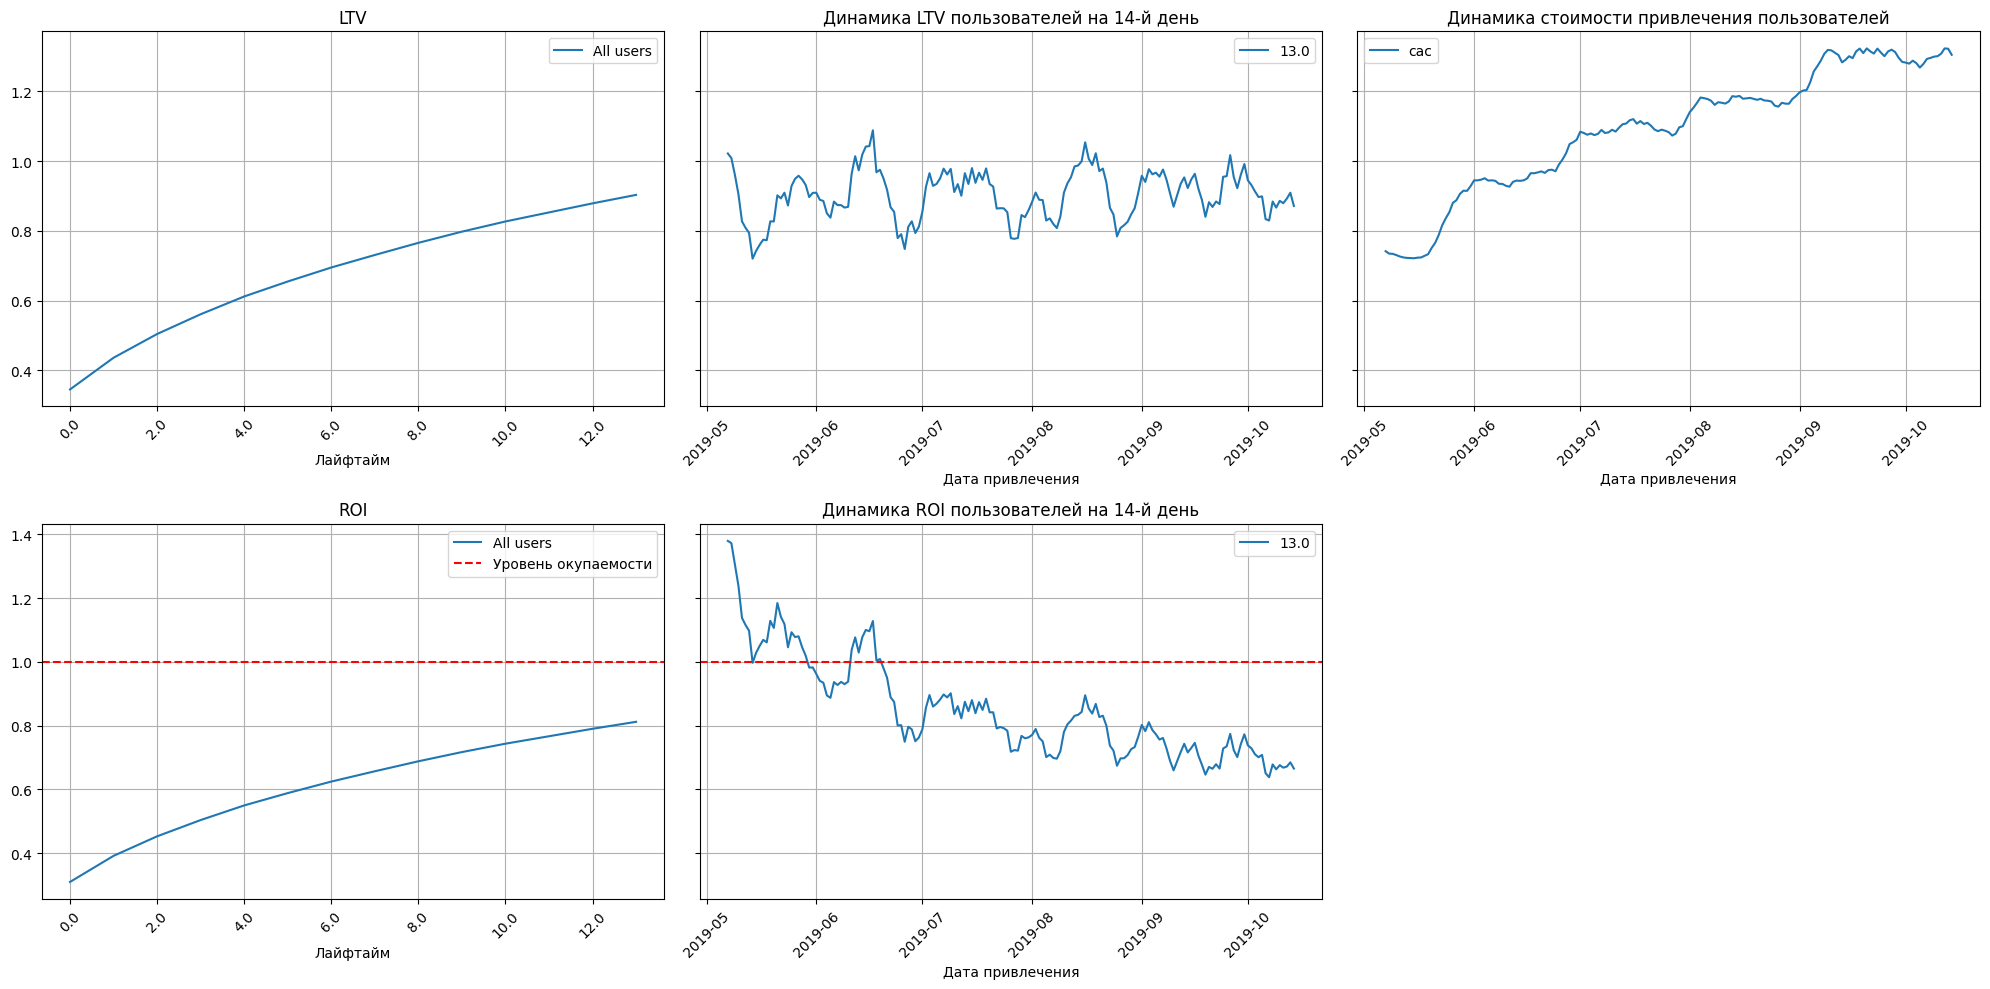

In [320]:
plot_ltv_roi(ltv=ltv,
             ltv_history=ltv_history,
             roi=roi,
             roi_history=roi_history,
             horizon=horizont_days)

Наблюдаем следущее
 - LTV начиная с июня 2019 периодический, но стабильный - резких спадов / подьмов нет
 - судя по ROI, привлеченные клиенты не окупились( дохода точно не принесли)
 - Динамика стоимости привлеччения пользователей растет во времени (судя по графику *с каждым следующим месяцем* стоимость привлечения ворзрастает)
 - одновременно с этим падает ROI и начиная с середины июля 2019 не окупается вовсе.

Из этого следует: прибыль не увеличивается с увеличением рекламных расходов, из-за чего возврат на инвестиции не окупается.


### Конверсия пользователей и ее динамика

Проверим конверсию пользователей. Используя функцию, получим конверсию и ее динамику. 

In [321]:
conv_raw, conversion, conversion_history = get_conversion(profiles=profiles,
                                                          purchases=orders,
                                                          observation_date=observation_date,

                                                          horizon_days=horizont_days)

строим графики

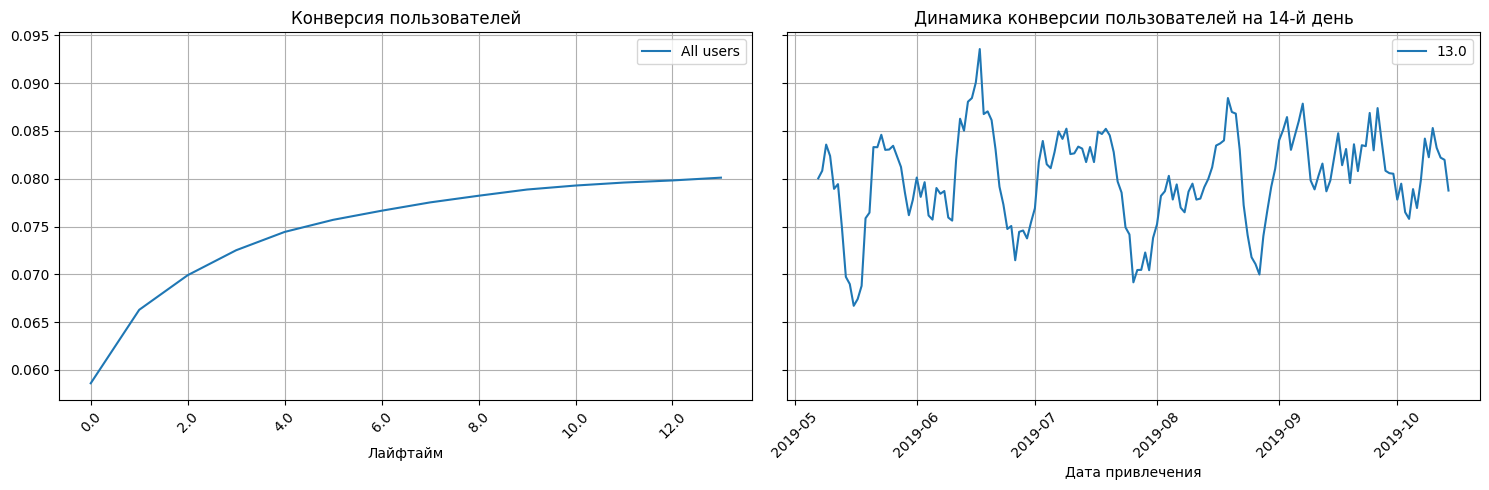

In [322]:
plot_conversion(conversion=conversion,
                conversion_history=conversion_history,
                horizon=horizont_days)

Видно, что динамика конверсии с июня увеличилась по сравнению с маем, ровно тогда, когда увеличились расходы на рекламу, и с июня по октябрь 2019 конверсия осталась в пределах от 5.55%  до 5.57%

### Удержание пользователей и её динамика

In [323]:
retention_raw, retention, retention_history = get_retention(profiles=profiles,
                                                            sessions=sessions,
                                                            observation_date=observation_date,
                                                            horizon_days=horizont_days)

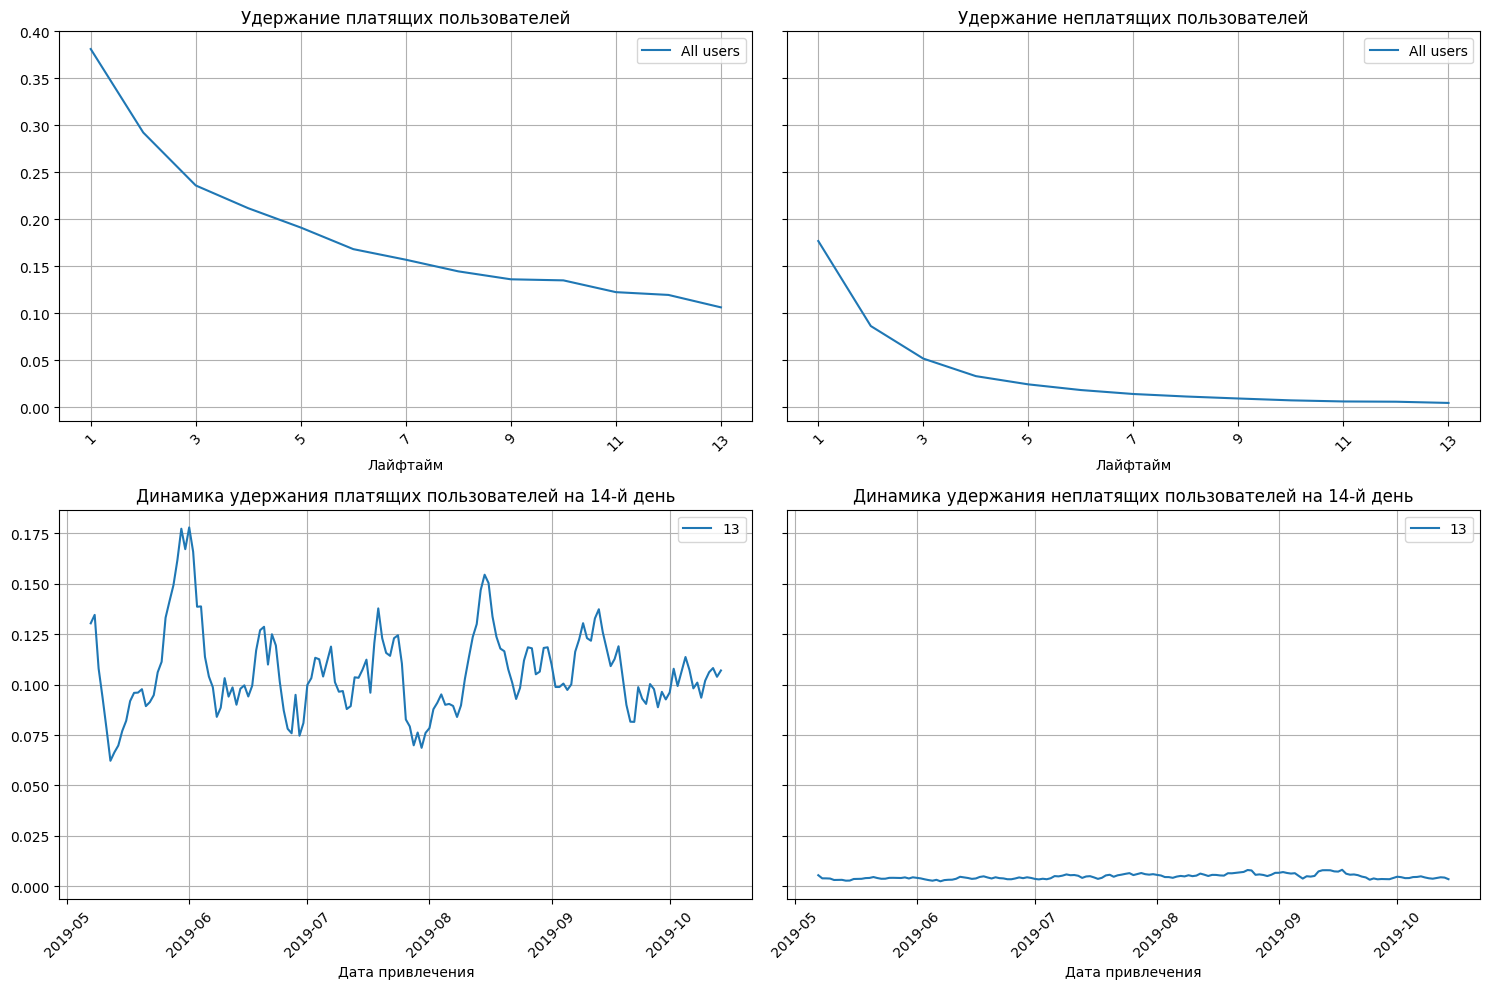

In [324]:
plot_retention(retention=retention,
               retention_history=retention_history,
               horizon=horizont_days)

Заметим   
 - неплатящие пользователи через 14 дней вовсе не пользуются приложением
 - платящие - продолжают возвращаться в приложение  
 - при этом , динамика удержания платящих клиентов  относительно стабильная, и держится в пределах 8%-12%

### Окупаемость рекламы с разбивкой по устройствам

Получим LTV, но по устройствам пользователей

In [325]:
ltv_raw, ltv, ltv_history, roi, roi_history = (
    get_ltv(profiles=profiles,
            purchases=orders,
            horizon_days=horizont_days, dimensions=['device'],
            observation_date=observation_date)
)

Для лучшей наглядности при построении графиков используем окно сглаживания в 30 дней

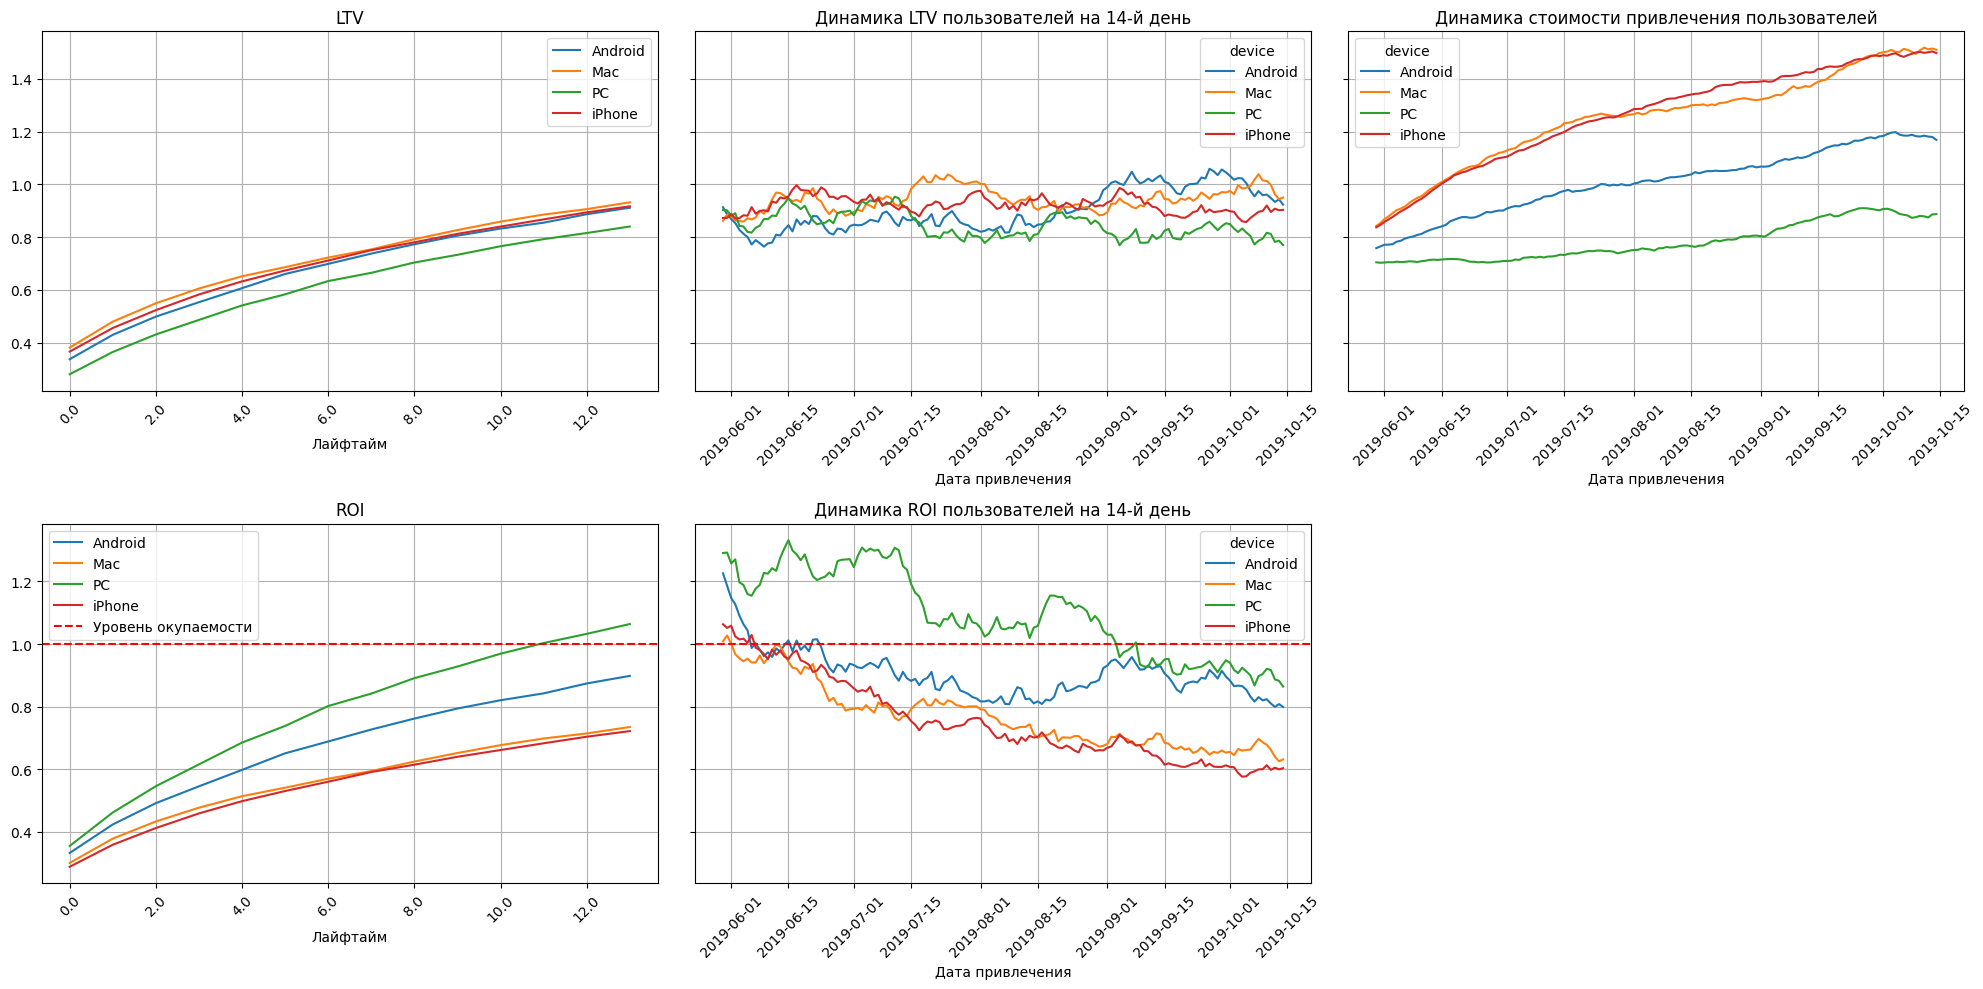

In [326]:
plot_ltv_roi(ltv=ltv,
             ltv_history=ltv_history,
             roi=roi,
             roi_history=roi_history,
             horizon=horizont_days,
             window=30)

Реклама, ориентированная на пользователей iPhone, Mac не окупается при высокой стоимости расходов на привлечение пользователей.

Окупились пользователи, использующие  
 - ПК
 - Android




#### Конверсия пользователей и ее динамика по устройствам

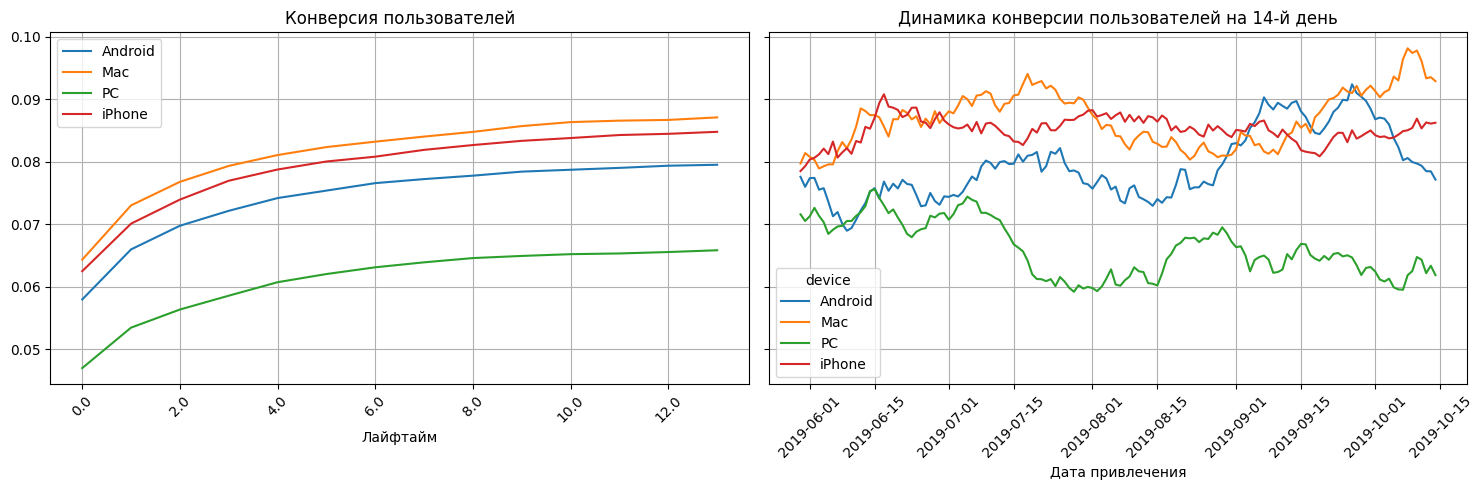

In [327]:
conv_raw, conversion, conversion_history = get_conversion(profiles=profiles,
                                                          purchases=orders,
                                                          observation_date=observation_date,
                                                          dimensions=[
                                                              'device'],
                                                          horizon_days=horizont_days)

plot_conversion(conversion=conversion,
                conversion_history=conversion_history,
                horizon=horizont_days,
                window=30)

В целом, конверсия пользователей  Mac и IPhone выше других.

#### Удержание пользователей и её динамика по устройствам

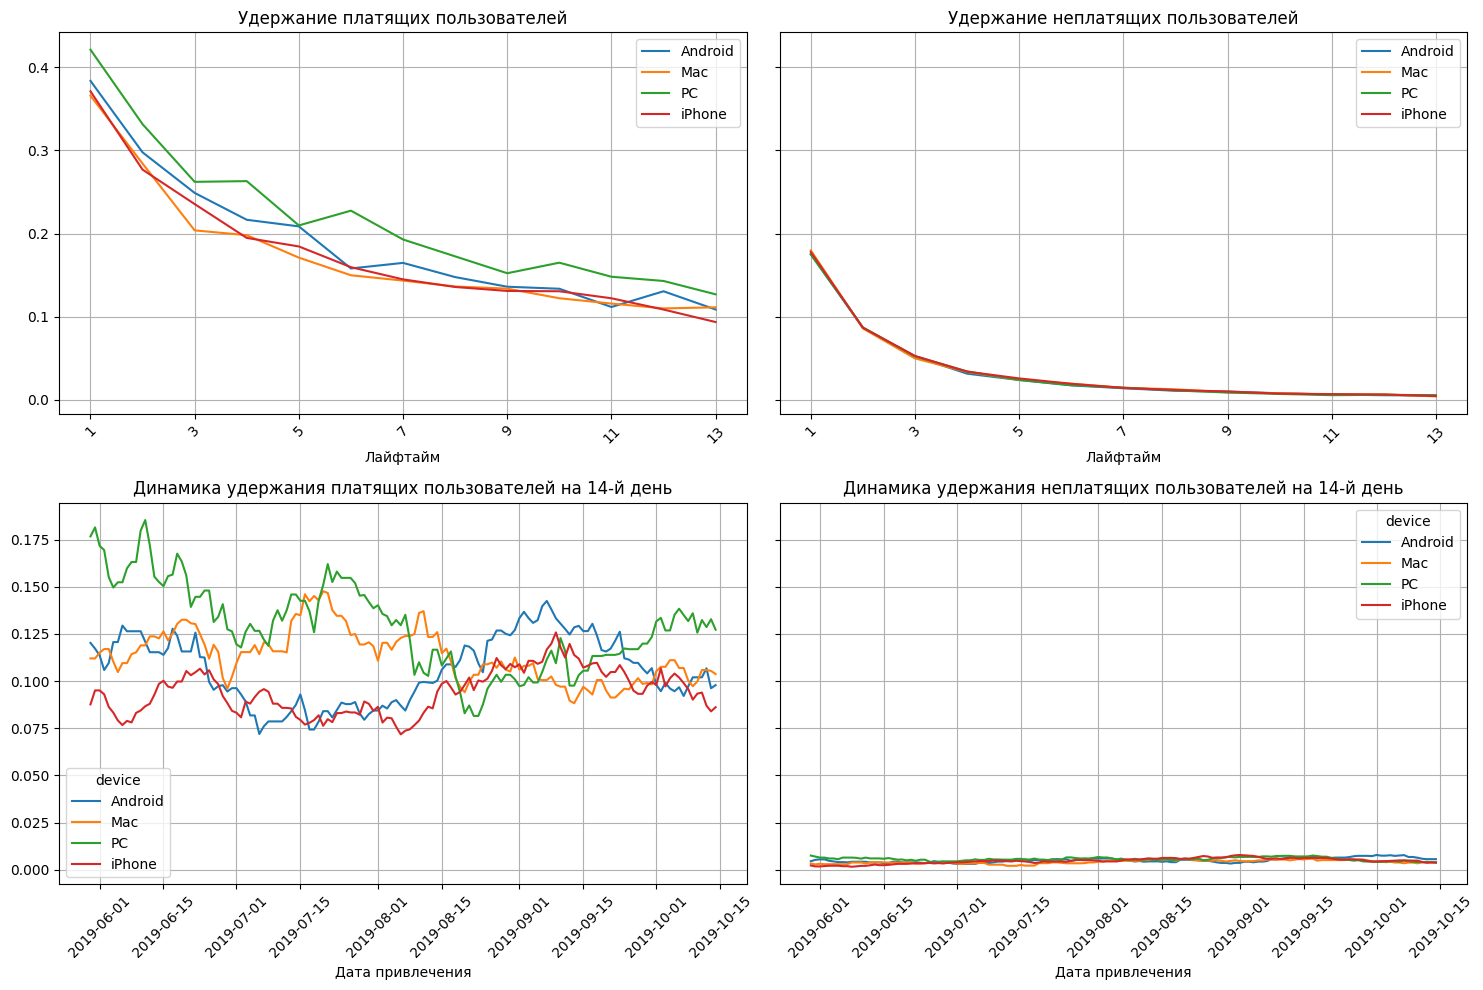

In [328]:
retention_raw, retention, retention_history = get_retention(profiles=profiles,
                                                            sessions=sessions,
                                                            observation_date=observation_date,
                                                            horizon_days=horizont_days,
                                                            dimensions=['device'])

plot_retention(retention=retention,
               retention_history=retention_history,
               horizon=horizont_days,
               window=30)

Удерживаются пользователи всех устройств почти одинаково. PC чуть больше

### Окупаемость рекламы с разбивкой по регионам

In [329]:
ltv_raw, ltv, ltv_history, roi, roi_history = (
    get_ltv(profiles=profiles,
            purchases=orders,
            horizon_days=horizont_days, dimensions=['region'],
            observation_date=observation_date)
)

для наглядности используем окно сглаживания в 30 дней

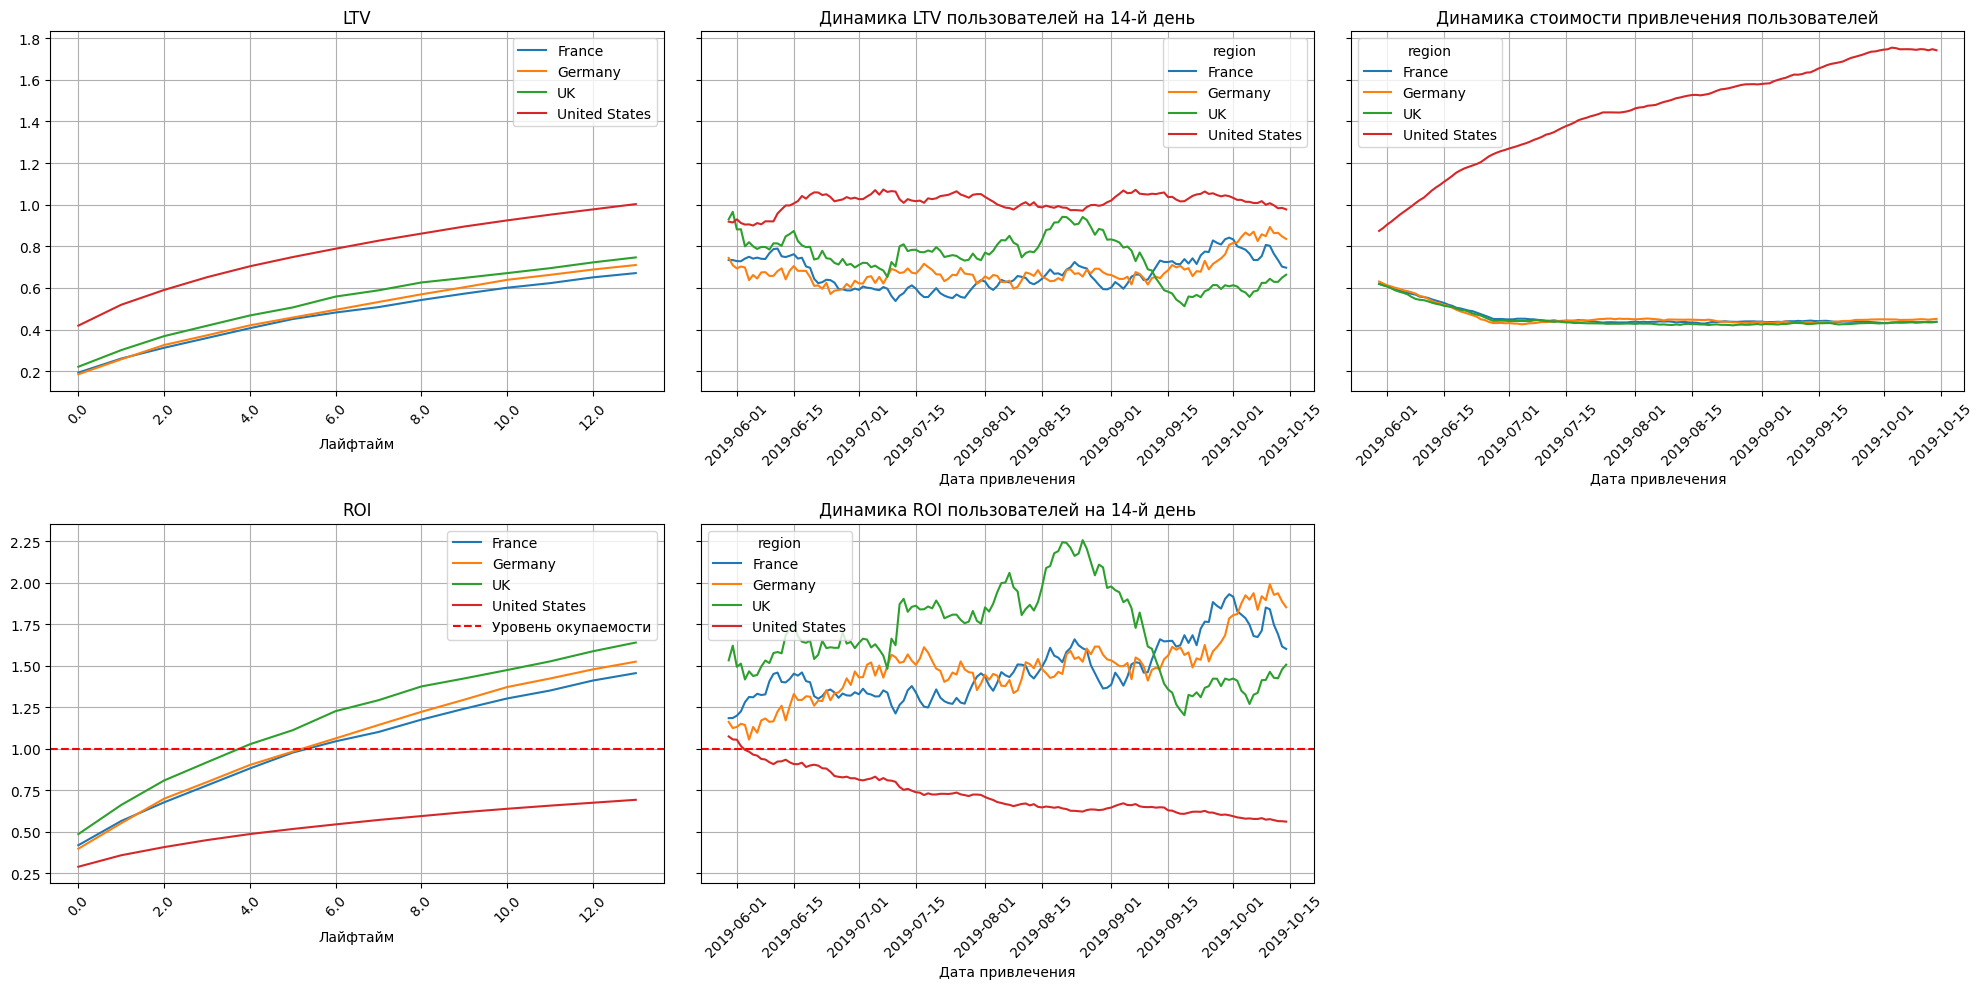

In [330]:
plot_ltv_roi(ltv=ltv,
             ltv_history=ltv_history,
             roi=roi,
             roi_history=roi_history,
             horizon=horizont_days,
             window=30)

Больше совершают покупки пользователи из США, их динамика выше других пользователей ,затраты на их привлечение высокие из-за чего они не окупились за весь узачемый период

Окупились клиенты из 
 - Великобритании
 - Германии
 - Франции


#### Конверсия пользователей и ее динамика по странам


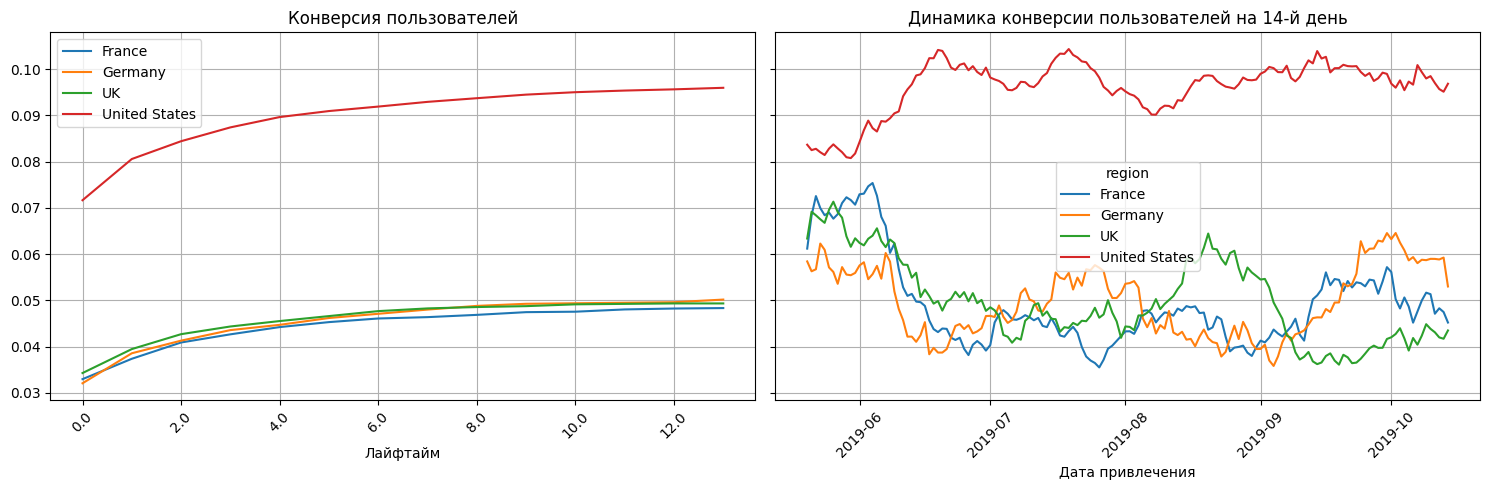

In [331]:
conv_raw, conversion, conversion_history = get_conversion(profiles=profiles,
                                                          purchases=orders,
                                                          observation_date=observation_date,
                                                          dimensions=[
                                                              'region'],
                                                          horizon_days=horizont_days)

plot_conversion(conversion=conversion,
                conversion_history=conversion_history,
                horizon=horizont_days,
                window=20)

Заметим, что конверсия пользователей из США заметно выше.

#### Удержание пользователей и её динамика по странам

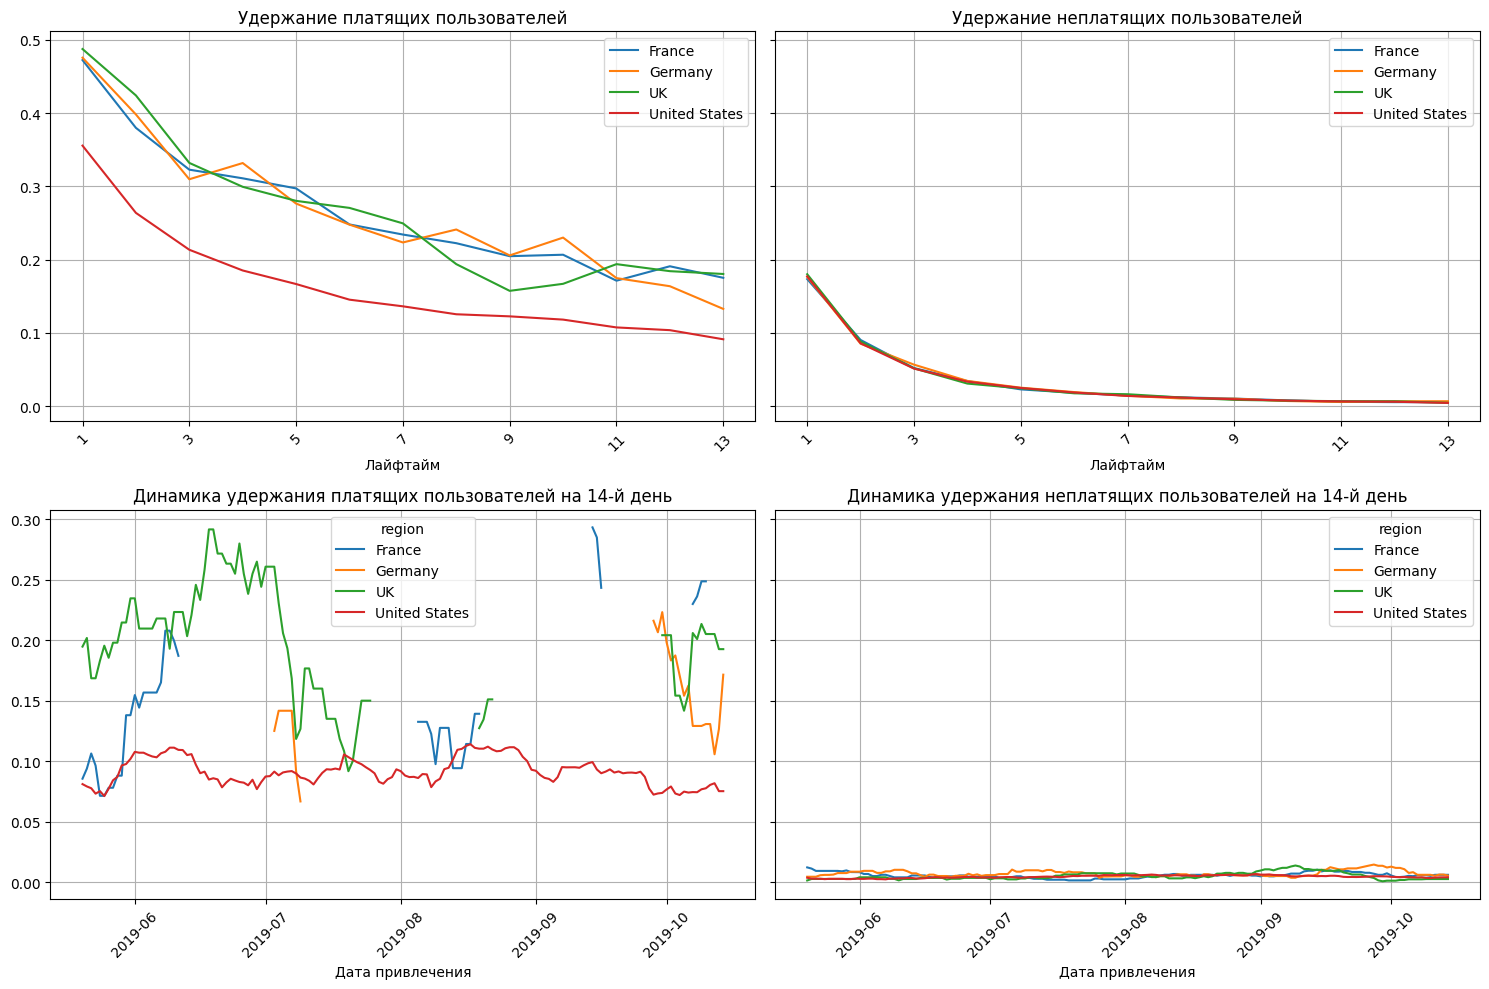

In [332]:
retention_raw, retention, retention_history = get_retention(profiles=profiles,
                                                            sessions=sessions,
                                                            observation_date=observation_date,
                                                            dimensions=['region'],
                                                            horizon_days=horizont_days)

plot_retention(retention=retention,
               retention_history=retention_history,
               horizon=horizont_days,
               window=20)

Пользователи из США хуже удерживаются чем с других стран.

### Окупаемость рекламы с разбивкой по каналам

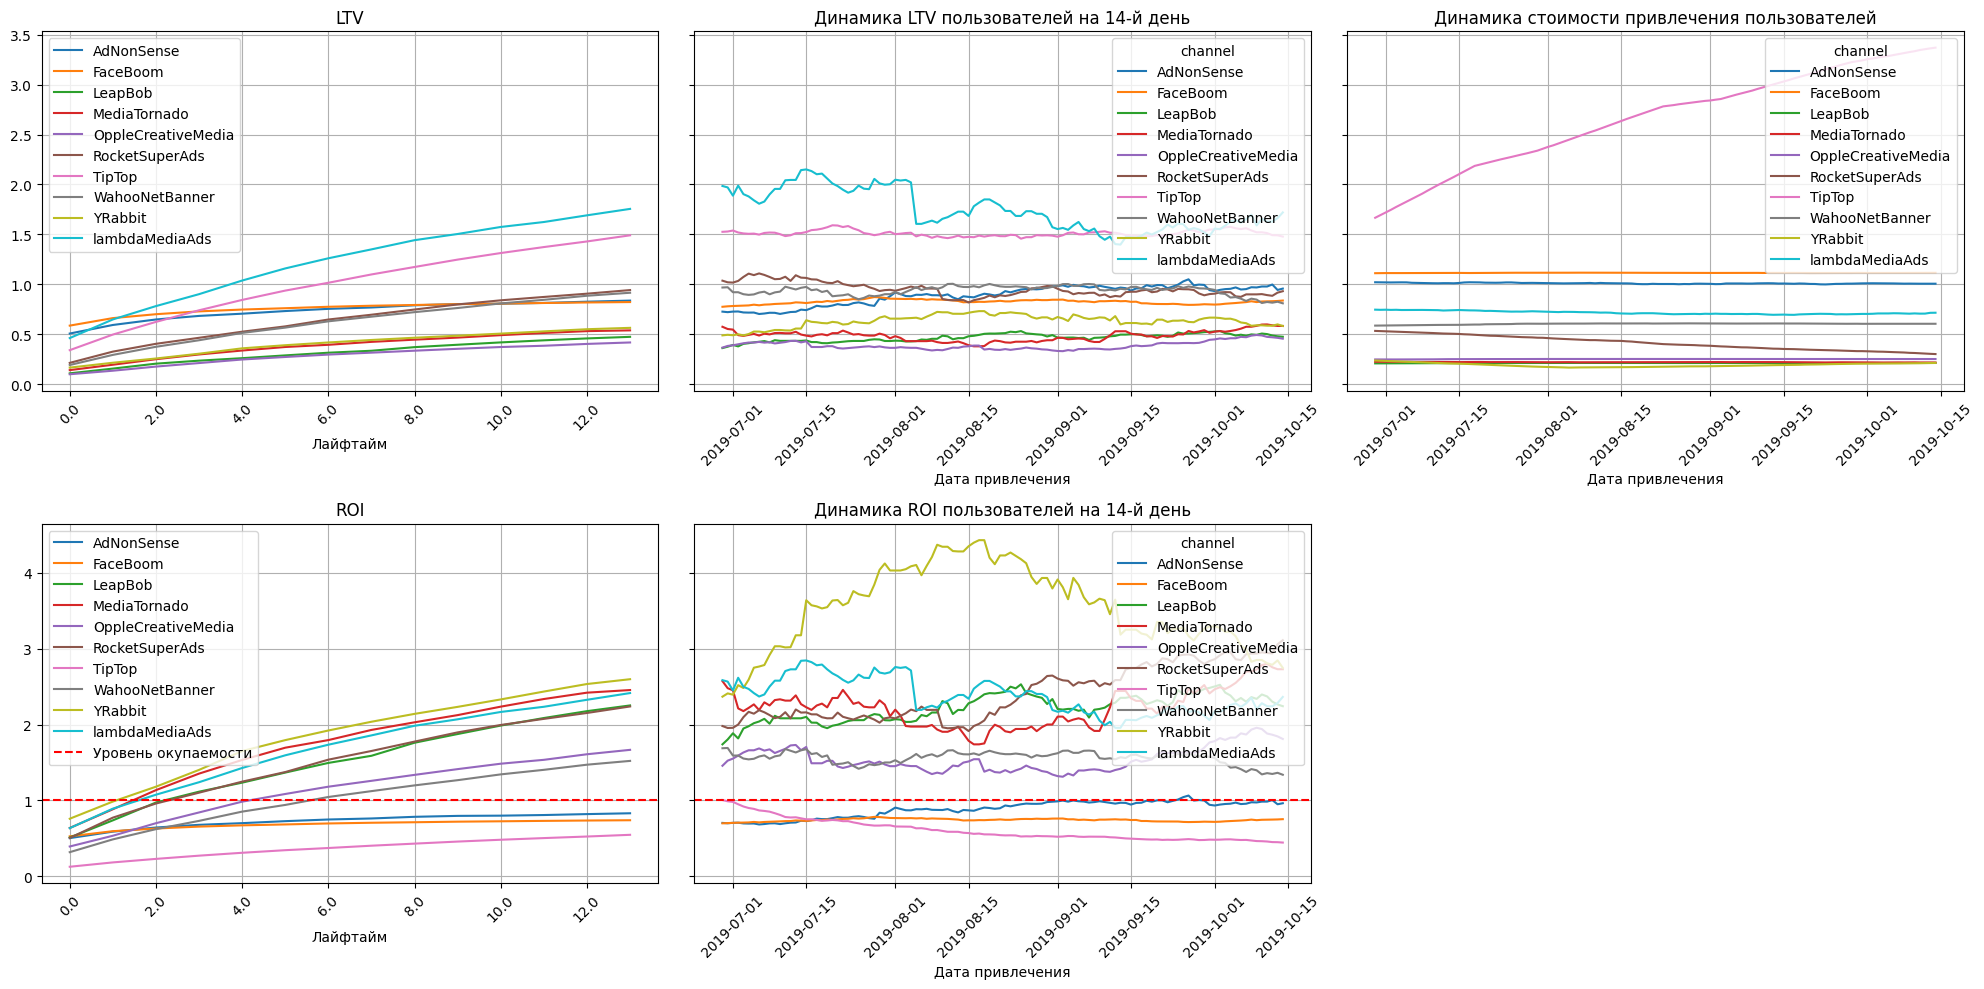

In [333]:
ltv_raw, ltv, ltv_history, roi, roi_history =(
    get_ltv(profiles=profiles,
            purchases=orders,
            horizon_days=horizont_days,
            dimensions=['channel'],
            observation_date=observation_date)
)

# Для наглядности используем окно сглаживания в 60 дней

plot_ltv_roi(ltv=ltv,
             ltv_history=ltv_history,
             roi=roi,
             roi_history=roi_history,
             horizon=horizont_days,
             window=60)

Клиенты больше производят покупки с каналов:
 - lambdaMediaAds
 - TipTop

Но Реклама не окупилась через такие каналы:                               
 - AdNonSense, 
 - FaceBoom,
 - TipTop  
да еще  стоимость расходов на рекламу TipTope значительно выше чем у других. 

Прекрасно окупились такие каналы(от большего к меньшему):  
 - YRabbit
 - MediaTornado
 - lambdaMediaAds
 - RocketSuperAds
 - LeapBob
 - OppleCreativeMedia
 - WahooNetBanner


#### Конверсия пользователей и ее динамика по каналам


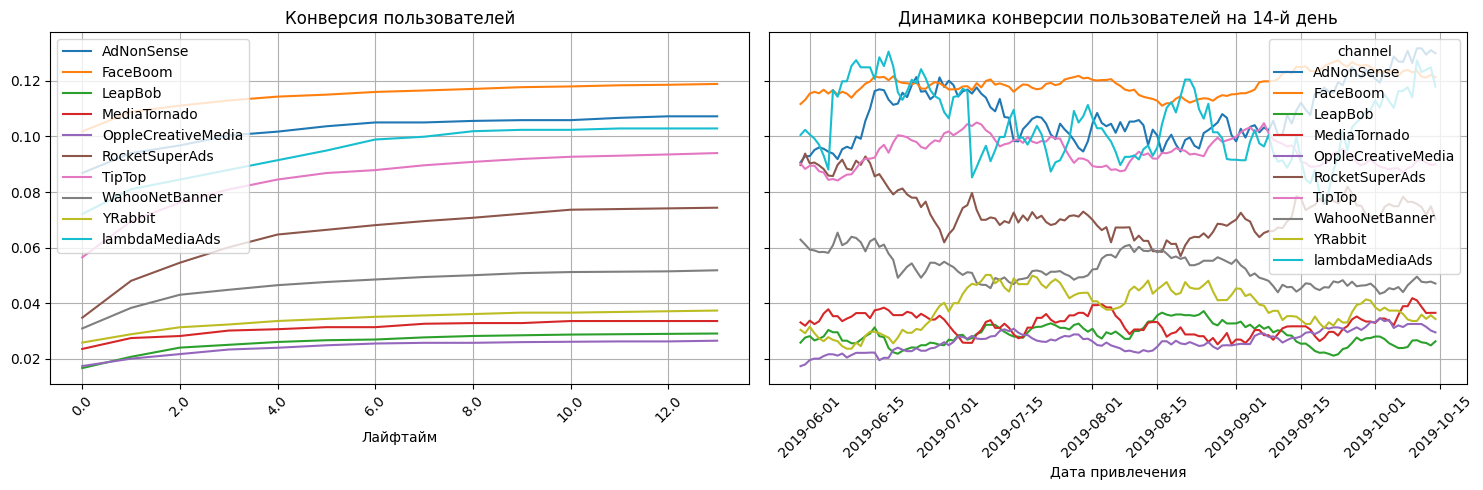

In [334]:
conv_raw, conversion, conversion_history = get_conversion(profiles=profiles,
                                                          purchases=orders,
                                                          observation_date=observation_date,
                                                          dimensions=[
                                                              'channel'],
                                                          horizon_days=horizont_days)

plot_conversion(conversion=conversion,
                conversion_history=conversion_history,
                horizon=horizont_days,
                window=30)

Конверсия значительно выше через каналы
  - FaceBoom (и стабильная среди этих вариантов)
  - AdNonSense
  - lambdaMediaAds
  - TipTop
  - RocketSuperAds


#### Удержание пользователей и её динамика по каналам привлечения

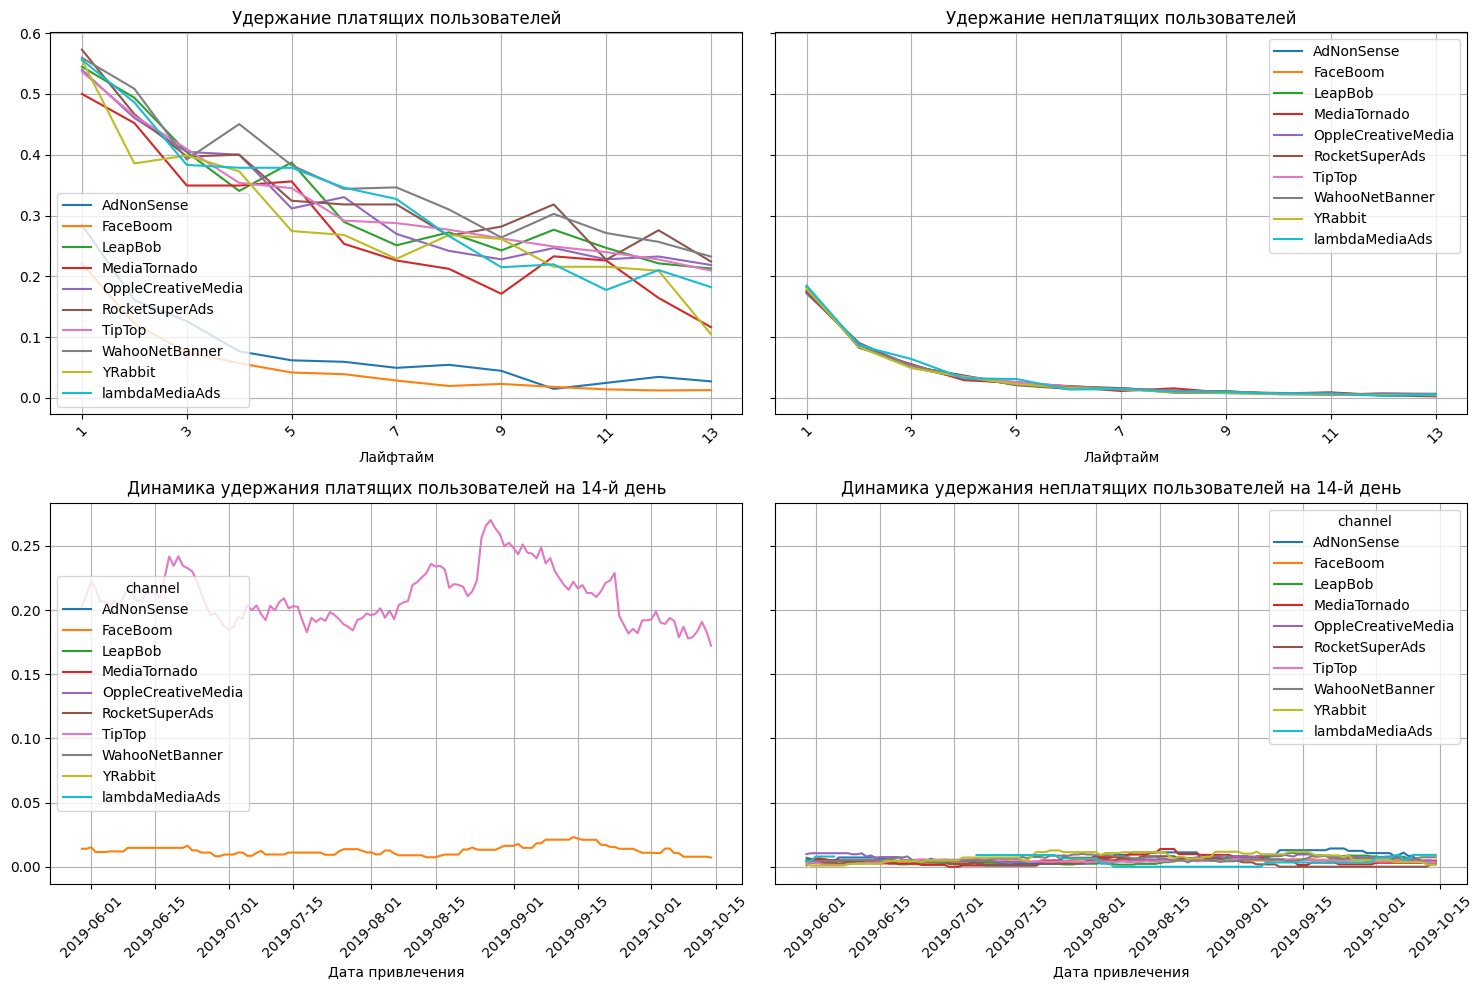

In [335]:
retention_raw, retention, retention_history = get_retention(profiles=profiles,
                                                            sessions=sessions,
                                                            observation_date=observation_date,
                                                            dimensions=[
                                                                'channel'],
                                                            horizon_days=horizont_days)

plot_retention(retention=retention,
               retention_history=retention_history,
               horizon=horizont_days,
               window=30)

Удержание пользователей через AdNonSense FaceBoom самое низкое.   
Но динамика удержания через TipTop самая высокая и держится в пределах 20-22%   
У FaceBoom низкая - менее 2%

#### Анализ каналов для США

оставим пользователей из США

In [336]:
profiles_usa = profiles.query('region=="United States"')

# проверим
profiles_usa.region.unique()

array(['United States'], dtype=object)

данные готовы для анализа. Изучим те же бизнес метрики для каналов привлечения.

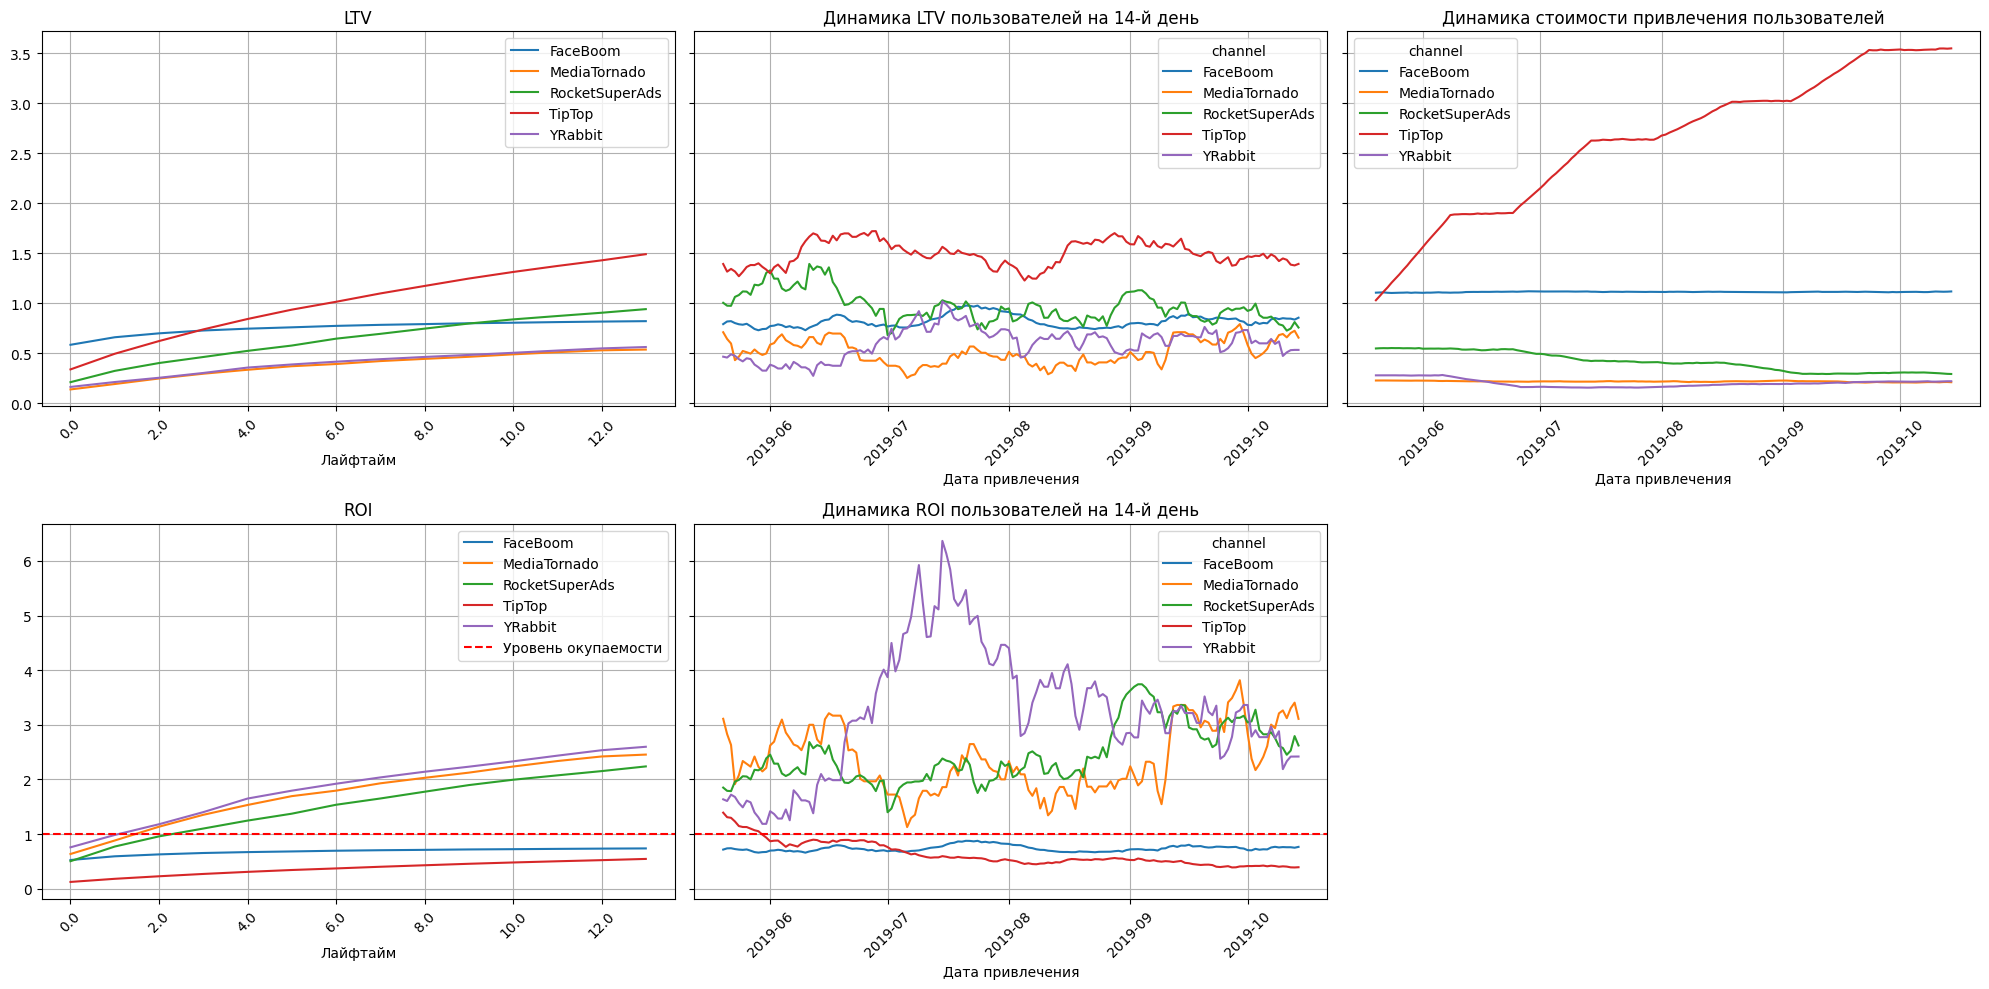

In [337]:
ltv_raw, ltv, ltv_history, roi, roi_history = (
    get_ltv(profiles=profiles_usa,
            purchases=orders,
            horizon_days=horizont_days,
            dimensions=['channel'],
            observation_date=observation_date)
)


# Для наглядности используем окно сглаживания в 20 дней

plot_ltv_roi(ltv=ltv,
             ltv_history=ltv_history,
             roi=roi,
             roi_history=roi_history,
             horizon=horizont_days,
             window=20)

покупок больше производят  пользователи через TipTop . По динамике их больше всех (около 150%).   
Но изза высоких расходов на привлечение через TipTop они не окупаются за весь изучаемый период.  
Заметим что, при увеличении стоимости на привлеченеи- динамика пользователейчерез TipTop значительно не меняется.


#### Конверсия пользователей из США и ее динамика по каналам


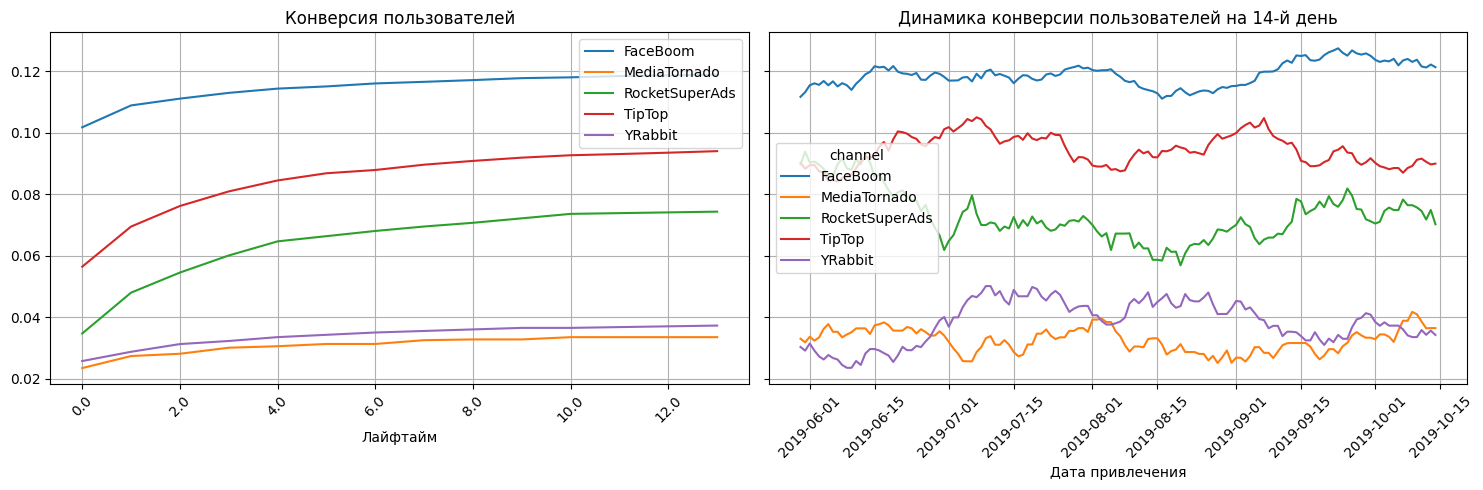

In [338]:
conv_raw, conversion, conversion_history = get_conversion(profiles=profiles_usa,
                                                          purchases=orders,
                                                          observation_date=observation_date,
                                                          dimensions=[
                                                              'channel'],
                                                          horizon_days=horizont_days)

plot_conversion(conversion=conversion,
                conversion_history=conversion_history,
                horizon=horizont_days,
                window=30
                )

Отметим, высокую конверсию через каналы  (от 6-12 %) 
 - FaceBoom  
 - TipTop
 - RocketSuperAds

#### Удержание пользователей из США и ее динамика по каналам


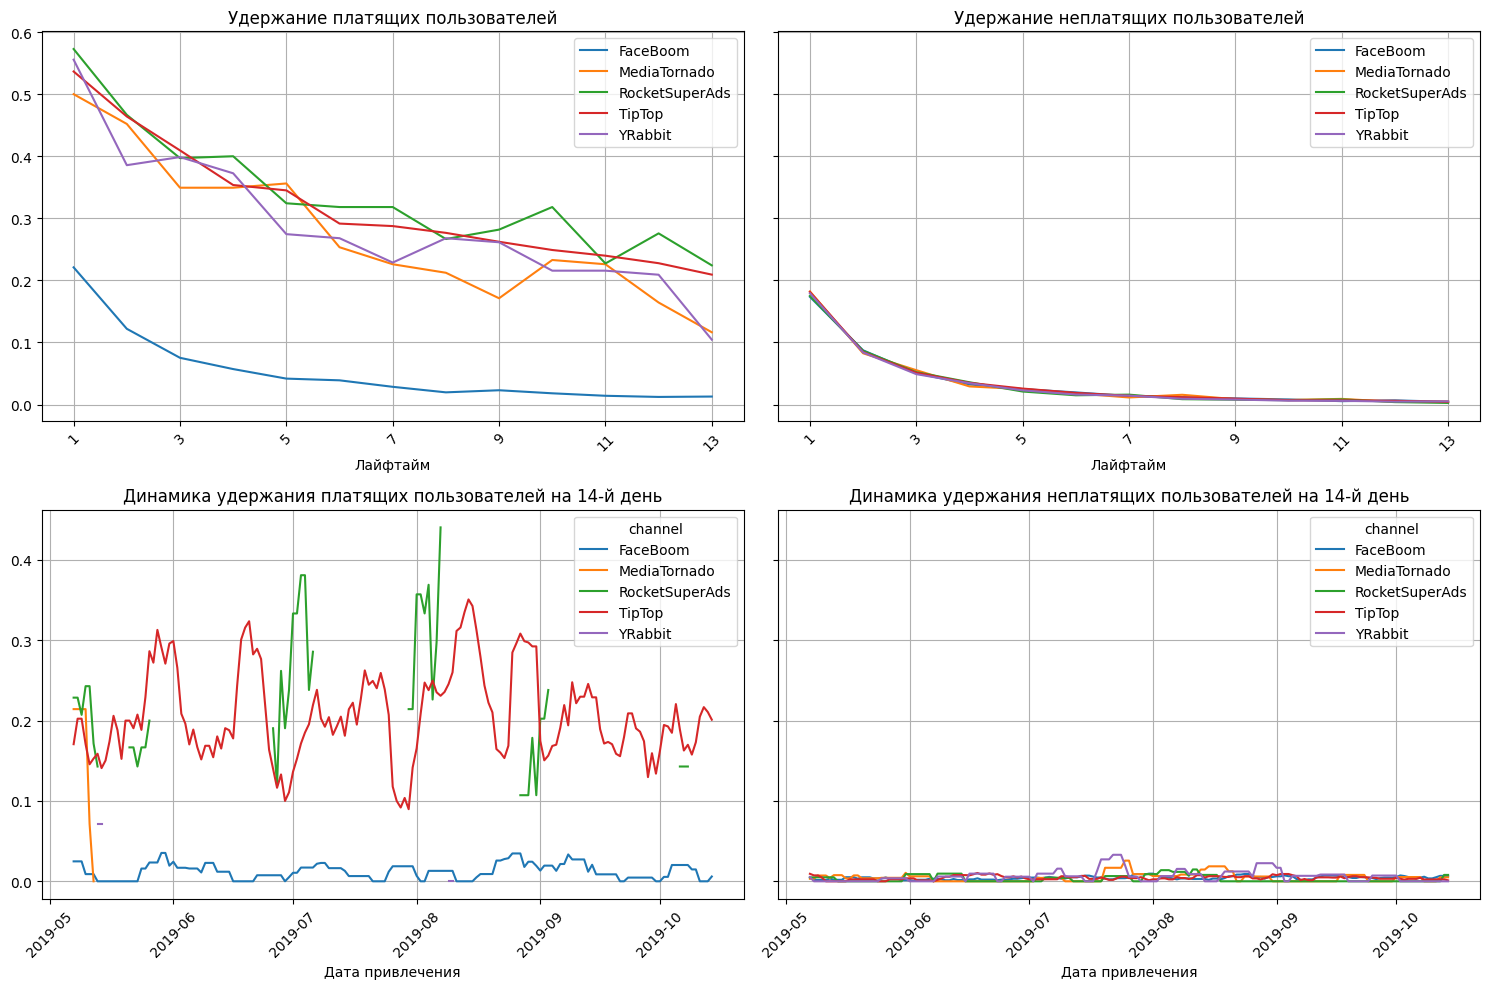

In [339]:

retention_raw, retention, retention_history = get_retention(profiles=profiles_usa,
                                                            sessions=sessions,
                                                            observation_date=observation_date,
                                                            dimensions=[
                                                                'channel'],
                                                            horizon_days=horizont_days)

plot_retention(retention=retention,
               retention_history=retention_history,
               horizon=horizont_days,
               window=7)

Хуже удерживаются пользователи через FaceBoom.  
Отлично удерживаются пользователи с TipTop, RocketSuperAds.

## Общие выводы

Загрузив предоставленные данные о пользователях, их покупках, расходах на рекламу и необходимые библиотеки    
были совершены следующие этапы:  
 - ознакомление с данными и их типами
 - проверка на дубликаты (0 дубликатов)
 - проверка на пропуски (0 пропусков)
 - приведение дат во всех файлах к нужному типу для дальнеших вычислений
 - переименование столбцов к нужному регистру
 написаны функции для  
 - создания профилей пользователей
 - расчета LTV ROI CAC по лайфтаймам и в динамике
 - расчета конверсии пользователей
 - рассчета удержания пользователей
 - построения соотвествующих графиков

Затем был проведен исследовательский анализ пользователей  
 - из каких стран они приходят в приложение
 - с каких устройств 
 - через какие рекламные источники приходят 

 Далле был проанализированы расходы на маркетинг, а именно  
 - общие расходы на рекламу 
 - расходы на конкретные рекламные источники 
 - динамика расходов на рекламу по неделям и месяцам 
 - средняя стоимость привлечения 1 клиента 
  
Затем оценив окупаемость рекламы   
 - в целом
 - с разбивкой по устройствам
 - с разбивкой по странам 
 - с разбивкой по рекламным каналам 




Можно сказать следующее, что 
 - Больше всего пользователей и доля платящих клиентов приходит из США
 - Значительное количество клиентов пользуется iPhone, а большая доля платящих клиентов использует iPhone и Mac
Большая часть клиентов приходит в приложение из:
   - самостоятельно, но доля платящих минимальна - 2%,
   
  - FaceBoom         12.20 %    
  - AdNonSense       11.34%   
  - lambdaMediaAds   10.47%   
  - TipTop           9.6 %   

 
 Потрачено на рекламу 105497 , из них
   - на TipTop - 52%,
   - на FaceBoom - 31%,
   - остальные - менее 5% на каждый 

А расходы на рекламу по такому источнику как TipTop возросли примерно в 3 раза, с мая по октябрь. На другие - расходы значительно не возрастали.

Средняя стоимость привлечения пользователя наивысшая через канал TipTop - 2.79, в то время как через другие - менее 1.1.

Исходя из анализа бизнес-показателей, результаты такие:   
НЕ ОКУПИЛИСЬ за исследуемый период расходы на рекламу,направленные на привлечение 
  - пользователей из США, 
  - клиентов, использующих iPhone и Мас   

с использованием таких рекламных источников как 
   - TipTop
   - AdNonSense
   - FaceBoom   


Окупились клиенты
 - из Великобритании, Германии, Франции
 - использующие ПК и Android
 - пришедшие через источники: 
   - YRabbit
   - MediaTornado
   - lambdaMediaAds
   - RocketSuperAds
   - LeapBob
   - OppleCreativeMedia
   - WahooNetBanner


Платящие пользователи удерживаются одинаково с разных устройств.
Конверсия выше для пользователей испльзующих Mac , iPhone.
Больше совершают покупки пользователи из США, их динамика выше других пользователей ,затраты на их привлечение высокие ииза чего они не окупились за весь узачемый период. 
Пользователи из США хуже удерживаются .


Исходя из анализа бизнес-показателей каналов для США, сказать можно следущее:
 - пользователи из США совершают больше покупок перейдя через TipTop, их динамика выше и значительно не меняется от увеличения расходов на TipTop, иизза чего этот канал не окупается.
 - При этом динамика конверсии относительно стабильная - держится в пределах 10% за весь узучаемый период.
 - Конверсия пользоватлей из США пришедших через FaceBoom высокая (и в динамике), но удерживаются они хуже.
 - Хуже удерживаются пользователи через FaceBoom.  
 - Отлично удерживаются пользователи с TipTop, RocketSuperAds.


Причины неэффективности привлечения пользователей:  
 - рвсходы сосредоточены на одном канале привлечения.  
 - конкуренты, продукт которых может не отличаться от данного приложения.
 - непродуманная реклама.


РЕКОМЕНДАЦИИ:  
 - снизить расходы на TipTop, FaceBoom
 - снизить расходы на привлечение пользователей Mac, iPhone
 - найти способы удержать пользователей приходящих через FaceBoom.
 - привлечь больше пользователей через RocketSuperAds (для США)

